# [IT Academy - Data Science with Python](https://www.barcelonactiva.cat/es/itacademy)
## S15 T01: Unsupervised Classification (In Process)
### [Github Unsupervised Classification](https://github.com/jesussantana/Unsupervised-Classification)
[![forthebadge made-with-python](http://ForTheBadge.com/images/badges/made-with-python.svg)](https://www.python.org/)  
[![Made withJupyter](https://img.shields.io/badge/Made%20with-Jupyter-orange?style=for-the-badge&logo=Jupyter)](https://jupyter.org/try)  
[![wakatime](https://wakatime.com/badge/github/jesussantana/Unsupervised-Classification.svg)](https://wakatime.com/badge/github/jesussantana/Unsupervised-Classification)

## Auto Import Python Libraries

https://pypi.org/project/pyforest/

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# ^^^ pyforest auto-imports - don't write above this line
#%pip install --upgrade pyforest
#!python -m pyforest install_extensions
%gui tk

In [2]:
# Import Dependencies
# ==============================================================================

from pyforest import *

In [3]:
# Check imported dependencies
lazy_imports()

['import nltk',
 'from sklearn.linear_model import Ridge',
 'from sklearn import svm',
 'import spacy',
 'from sklearn.model_selection import cross_val_score',
 'from statsmodels.tsa.arima_model import ARIMA',
 'from openpyxl import load_workbook',
 'from sklearn.model_selection import StratifiedKFold',
 'from sklearn.ensemble import RandomForestRegressor',
 'import tqdm',
 'from scipy import stats',
 'from sklearn.preprocessing import StandardScaler',
 'from pyspark import SparkContext',
 'from sklearn.preprocessing import MinMaxScaler',
 'from sklearn.preprocessing import PolynomialFeatures',
 'import seaborn as sns',
 'from sklearn.model_selection import train_test_split',
 'import dash',
 'from sklearn.preprocessing import OneHotEncoder',
 'import sys',
 'import skimage',
 'import bokeh',
 'from PIL import Image',
 'from sklearn.linear_model import LinearRegression',
 'import tensorflow as tf',
 'import torch',
 'import textblob',
 'from sklearn.feature_extraction.text import Count

In [4]:
# Data wrangling
# ==============================================================================
import missingno as msno 

# Metrics
# ==============================================================================
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Pandas configuration
# ==============================================================================
pd.set_option('display.max_columns', None)

# Others Plots
# ==============================================================================
from yellowbrick.cluster import SilhouetteVisualizer

# Matplotlib configuration
# ==============================================================================
import matplotlib.ticker as ticker
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
#style.use('ggplot') or plt.style.use('ggplot')
%matplotlib inline

# Seaborn configuration
# ==============================================================================
sns.set_theme(style='darkgrid', palette='deep')
dims = (20, 16)

# Warnings configuration
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Folder configuration
# ==============================================================================
from os import path
import sys
new_path = '../scripts/'
if new_path not in sys.path:
    sys.path.append(new_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Classify the different flights

### Exercise 1: 
  - Classify the different flights using the K-means algorithm.


### Exercise 2: 
  - Classify the different flights using the hierarchical clustering algorithm.


### Exercise 3: 
  - Calculate clustering performance using a parameter such as silhouette.

In [5]:
# Path folder configuration
# ===============================================================================

path = '../data/'
file = 'raw/DelayedFlights.csv'

df_raw = pd.read_csv(path+file)

<IPython.core.display.Javascript object>

In [6]:
df = df_raw.copy()

## Exploratory analysis

In [7]:
df.head()

Unnamed: 0  Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  \
0           0  2008      1           3          4   2003.0        1955   
1           1  2008      1           3          4    754.0         735   
2           2  2008      1           3          4    628.0         620   
3           4  2008      1           3          4   1829.0        1755   
4           5  2008      1           3          4   1940.0        1915   

   ArrTime  CRSArrTime UniqueCarrier  FlightNum TailNum  ActualElapsedTime  \
0   2211.0        2225            WN        335  N712SW              128.0   
1   1002.0        1000            WN       3231  N772SW              128.0   
2    804.0         750            WN        448  N428WN               96.0   
3   1959.0        1925            WN       3920  N464WN               90.0   
4   2121.0        2110            WN        378  N726SW              101.0   

   CRSElapsedTime  AirTime  ArrDelay  DepDelay Origin Dest  Distance  TaxiIn  \
0           150.0    116.0     -14.0       8.0    IAD  TPA       810     4.0   
1           145.0    113.0       2.0      19.0    IAD  TPA       810     5.0   
2            90.0     76.0      14.0       8.0    IND  BWI       515     3.0   
3            90.0     77.0      34.0      34.0    IND  BWI       515     3.0   
4           115.0     87.0      11.0      25.0    IND  JAX       688     4.0   

   TaxiOut  Cancelled CancellationCode  Diverted  CarrierDelay  WeatherDelay  \
0      8.0          0                N         0           NaN           NaN   
1     10.0          0                N         0           NaN           NaN   
2     17.0          0                N         0           NaN           NaN   
3     10.0          0                N         0           2.0           0.0   
4     10.0          0                N         0           NaN           NaN   

   NASDelay  SecurityDelay  LateAircraftDelay  
0       NaN            NaN                NaN  
1       NaN            NaN                NaN  
2       NaN            NaN                NaN  
3       0.0            0.0               32.0  
4       NaN            NaN                NaN

In [8]:
df=df.rename(columns={"Unnamed: 0": "ID"})

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ID                 int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

In [10]:
df.shape

(1936758, 30)

In [11]:
df.isna().sum().sort_values()

ID                        0
Distance                  0
Dest                      0
Origin                    0
DepDelay                  0
Cancelled                 0
CancellationCode          0
Diverted                  0
UniqueCarrier             0
FlightNum                 0
CRSDepTime                0
DepTime                   0
DayOfWeek                 0
DayofMonth                0
Month                     0
Year                      0
CRSArrTime                0
TailNum                   5
CRSElapsedTime          198
TaxiOut                 455
TaxiIn                 7110
ArrTime                7110
AirTime                8387
ActualElapsedTime      8387
ArrDelay               8387
SecurityDelay        689270
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
LateAircraftDelay    689270
dtype: int64

### Sample Dataset to be able to work with him

In [12]:
df = df.sample(frac=0.001, random_state = 6858)
df.to_csv(path + "interim/DelayedFlights_Sample.csv", index = False, header = True)

### Drop features that we do not adds value

In [13]:
df.drop(axis=1,columns=['Year','Cancelled','Diverted','CancellationCode','FlightNum'], inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1937 entries, 32721 to 693767
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1937 non-null   int64  
 1   Month              1937 non-null   int64  
 2   DayofMonth         1937 non-null   int64  
 3   DayOfWeek          1937 non-null   int64  
 4   DepTime            1937 non-null   float64
 5   CRSDepTime         1937 non-null   int64  
 6   ArrTime            1931 non-null   float64
 7   CRSArrTime         1937 non-null   int64  
 8   UniqueCarrier      1937 non-null   object 
 9   TailNum            1937 non-null   object 
 10  ActualElapsedTime  1931 non-null   float64
 11  CRSElapsedTime     1937 non-null   float64
 12  AirTime            1931 non-null   float64
 13  ArrDelay           1931 non-null   float64
 14  DepDelay           1937 non-null   float64
 15  Origin             1937 non-null   object 
 16  Dest              

In [15]:
df.shape

(1937, 25)

In [16]:
df.isna().sum()

ID                     0
Month                  0
DayofMonth             0
DayOfWeek              0
DepTime                0
CRSDepTime             0
ArrTime                6
CRSArrTime             0
UniqueCarrier          0
TailNum                0
ActualElapsedTime      6
CRSElapsedTime         0
AirTime                6
ArrDelay               6
DepDelay               0
Origin                 0
Dest                   0
Distance               0
TaxiIn                 6
TaxiOut                1
CarrierDelay         668
WeatherDelay         668
NASDelay             668
SecurityDelay        668
LateAircraftDelay    668
dtype: int64

## Distribution of the response variable

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

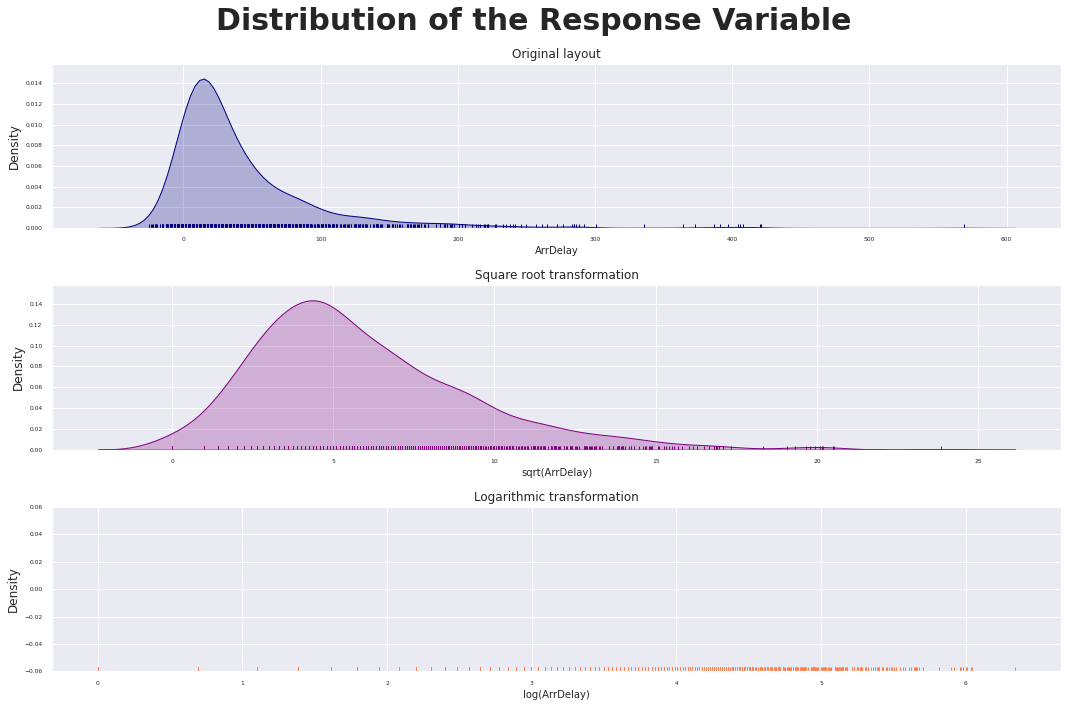

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))
sns.distplot(
    df.ArrDelay,
    hist    = False,
    rug     = True,
    color   = "navy",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Original layout", fontsize = 'medium')
axes[0].set_xlabel('ArrDelay', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.distplot(
    np.sqrt(df.ArrDelay),
    hist    = False,
    rug     = True,
    color   = "purple",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Square root transformation", fontsize = 'medium')
axes[1].set_xlabel('sqrt(ArrDelay)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.distplot(
    np.log(df.ArrDelay),
    hist    = False,
    rug     = True,
    color   = "coral",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Logarithmic transformation", fontsize = 'medium')
axes[2].set_xlabel('log(ArrDelay)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.suptitle('Distribution of the Response Variable', fontsize = 30, fontweight = "bold")
fig.tight_layout()
plt.savefig("../reports/figures/Distribution_Response_Variable.png")

## Numerical variables

In [18]:
df.select_dtypes(include=['float64', 'int']).describe().round(3)

ID     Month  DayofMonth  DayOfWeek   DepTime  CRSDepTime  \
count     1937.000  1937.000    1937.000   1937.000  1937.000    1937.000   
mean   3383679.770     6.188      15.640      3.979  1525.730    1472.327   
std    2091877.698     3.527       8.625      1.955   446.757     421.887   
min       1682.000     1.000       1.000      1.000     6.000      10.000   
25%    1491121.000     3.000       8.000      2.000  1216.000    1145.000   
50%    3304630.000     6.000      16.000      4.000  1550.000    1511.000   
75%    5168977.000     9.000      23.000      5.000  1854.000    1820.000   
max    7008745.000    12.000      31.000      7.000  2356.000    2359.000   

        ArrTime  CRSArrTime  ActualElapsedTime  CRSElapsedTime   AirTime  \
count  1931.000    1937.000           1931.000        1937.000  1931.000   
mean   1619.845    1642.602            130.875         132.051   106.202   
std     549.547     463.585             70.310          69.969    67.079   
min       2.000       1.000             32.000          30.000    14.000   
25%    1334.000    1345.000             78.000          80.000    56.000   
50%    1730.000    1715.000            113.000         115.000    88.000   
75%    2029.500    2010.000            161.000         161.000   134.000   
max    2359.000    2359.000            441.000         419.000   370.000   

       ArrDelay  DepDelay  Distance    TaxiIn   TaxiOut  CarrierDelay  \
count  1931.000  1937.000  1937.000  1931.000  1936.000      1269.000   
mean     42.474    43.697   749.702     6.686    18.019        18.381   
std      56.640    53.677   569.053     4.470    13.466        42.627   
min     -25.000     6.000    45.000     1.000     1.000         0.000   
25%       9.000    12.000   334.000     4.000    10.000         0.000   
50%      24.000    24.000   594.000     6.000    14.000         1.000   
75%      55.000    53.000   984.000     8.000    21.000        19.000   
max     569.000   571.000  3329.000    44.000   137.000       569.000   

       WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay  
count      1269.000  1269.000       1269.000           1269.000  
mean          4.009    15.340          0.043             24.800  
std          20.647    36.476          0.923             42.243  
min           0.000     0.000          0.000              0.000  
25%           0.000     0.000          0.000              0.000  
50%           0.000     2.000          0.000              6.000  
75%           0.000    14.000          0.000             33.000  
max         285.000   421.000         25.000            387.000

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

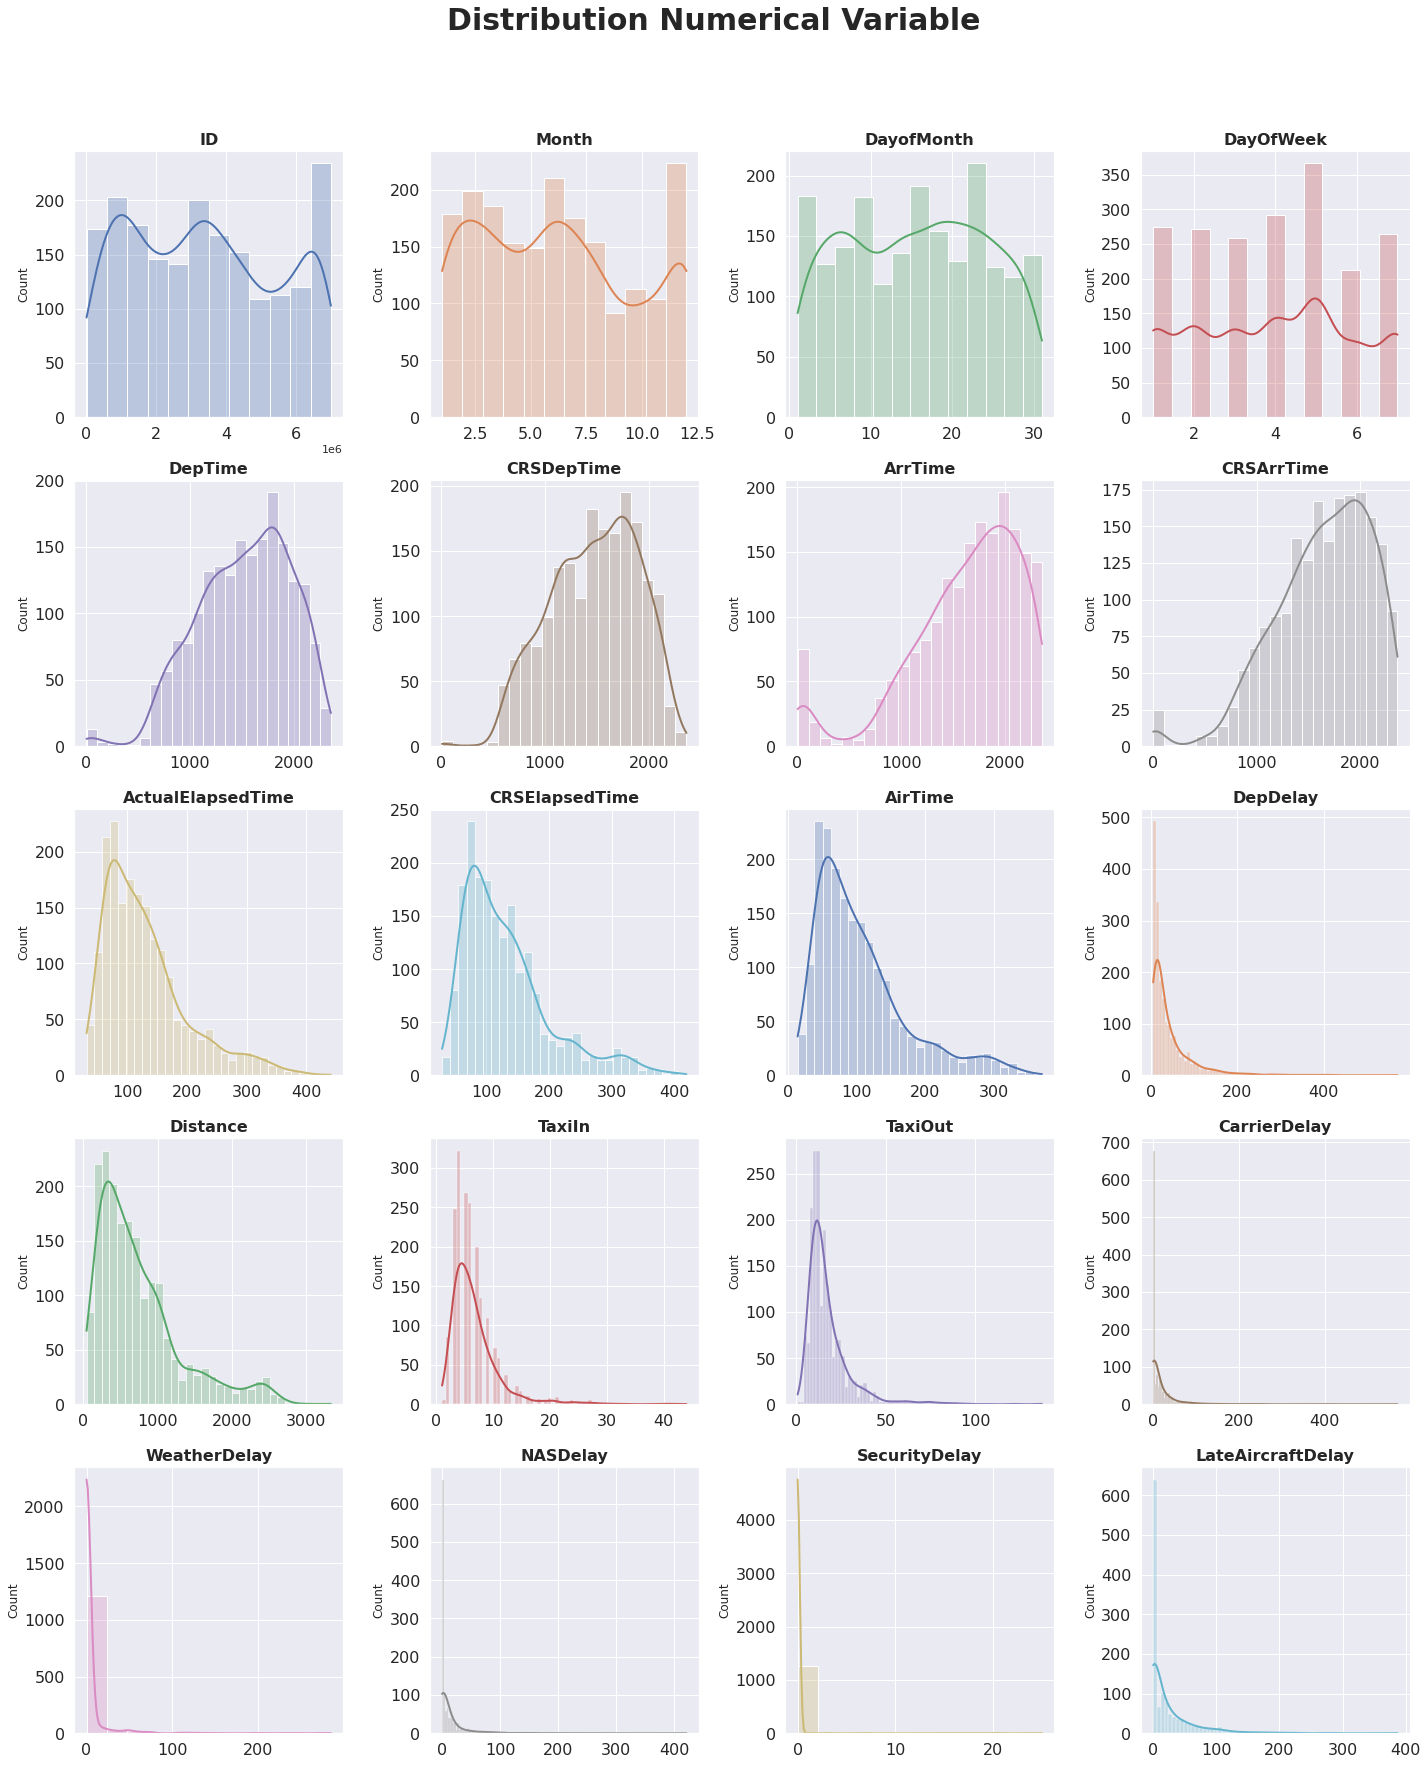

In [19]:
# Distribution graph for each numerical variable
# ==============================================================================
# Adjust number of subplots based on the number of columns

fig, axes = plt.subplots(ncols=4, nrows=5, figsize=(20, 25))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('ArrDelay')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 16, fontweight = "bold")
    axes[i].tick_params(labelsize = 16)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribution Numerical Variable', fontsize = 30, fontweight = "bold")
plt.savefig("../reports/figures/Distribution_Numerical_Variable.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

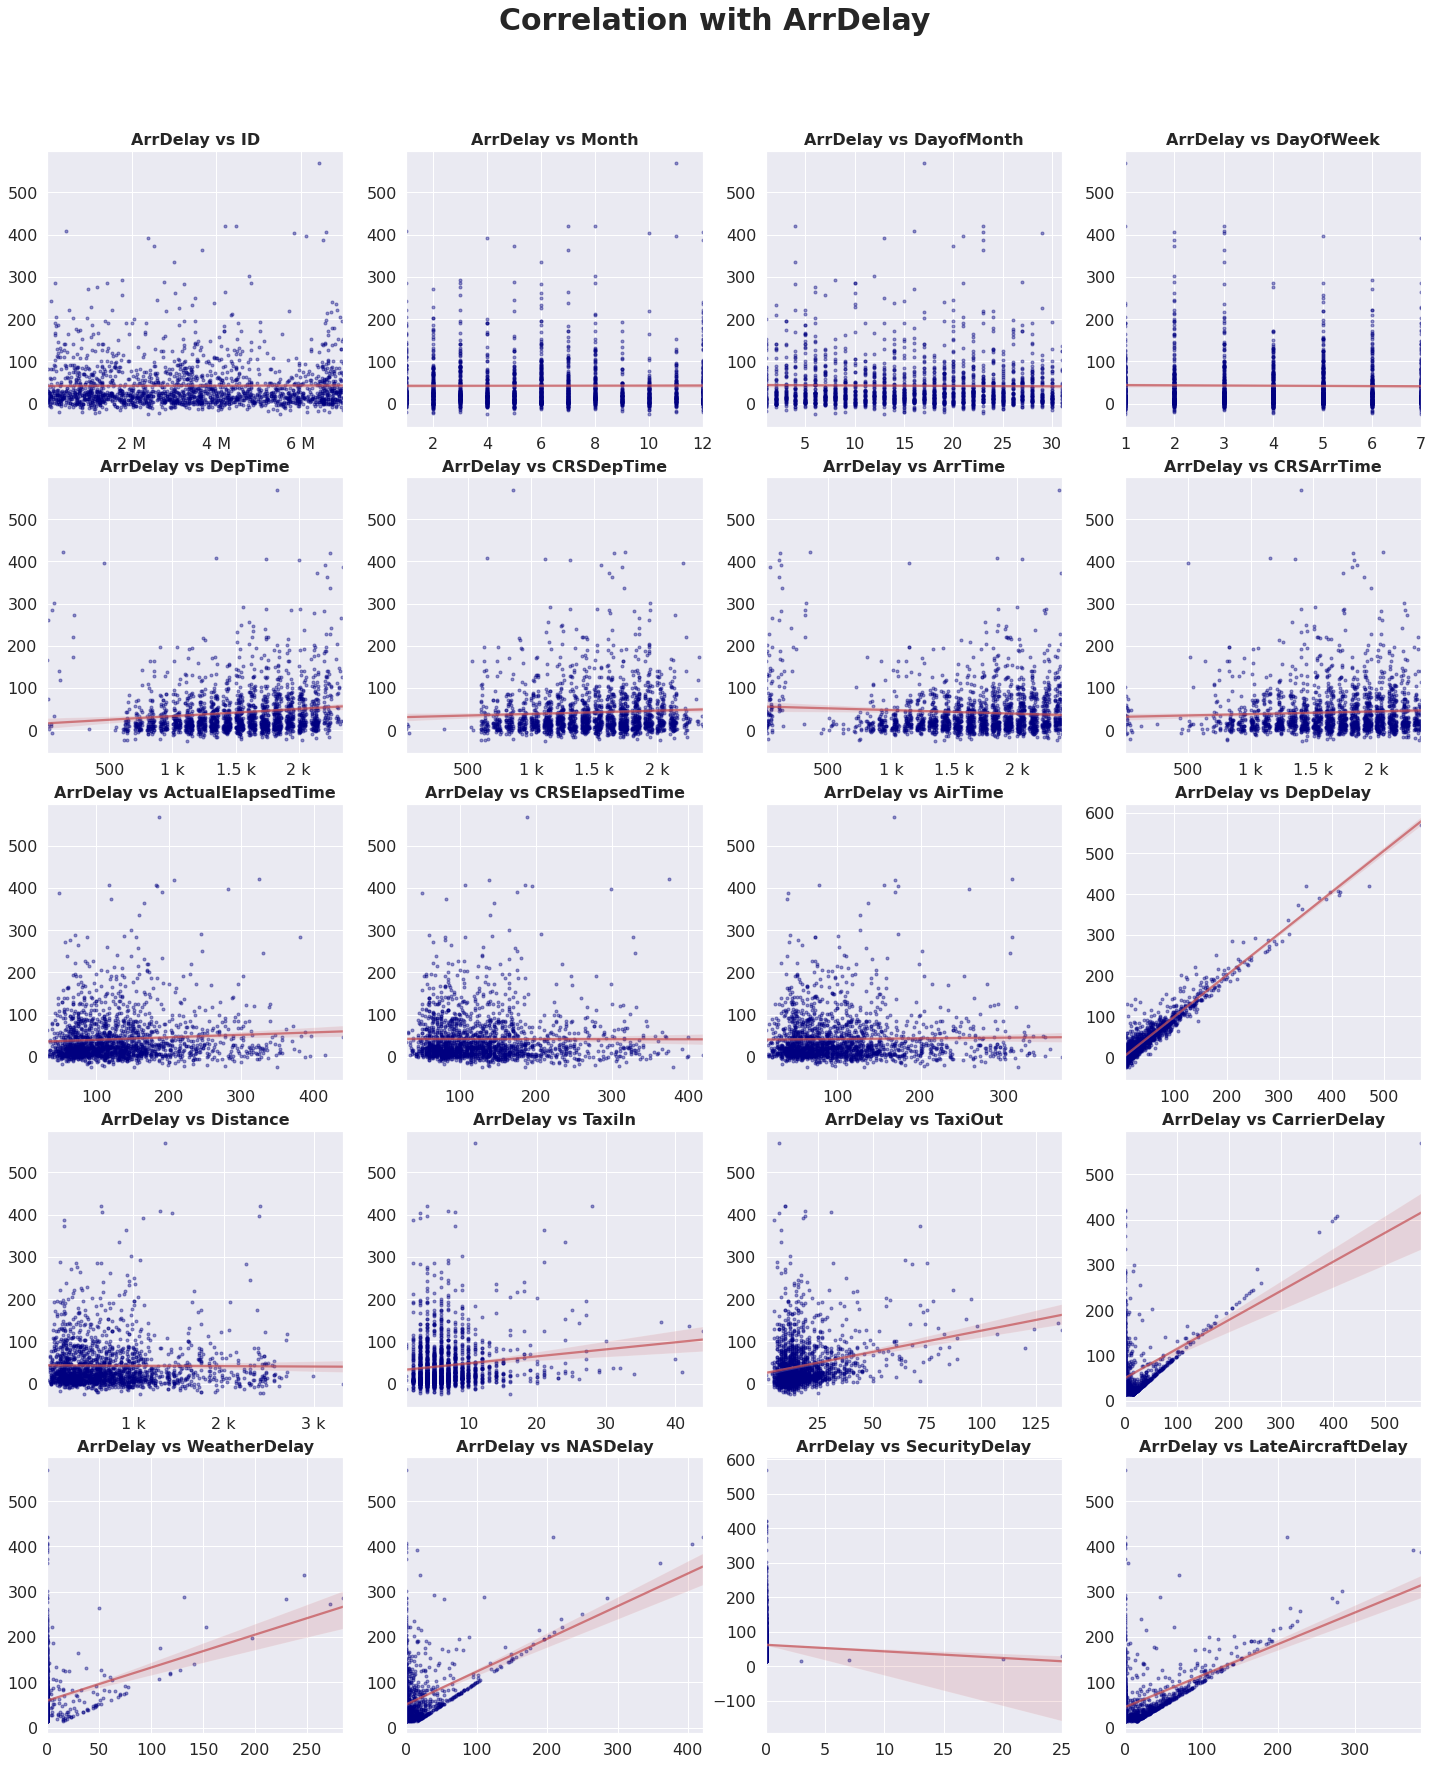

In [20]:
# Distribution graph for each numerical variable
# ==============================================================================
# Adjust number of subplots based on the number of columns
fig, axes = plt.subplots(ncols=4, nrows=5,  figsize=(20, 25))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('ArrDelay')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = df[colum],
        y           = df['ArrDelay'],
        color       = "navy",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"ArrDelay vs {colum}", fontsize = 16, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 16)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

    #if (i-1 >= len(columnas_numeric)-1): break

# Empty axes are removed
"""for i in [8]:
    fig.delaxes(axes[i])"""
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlation with ArrDelay', fontsize = 30, fontweight = "bold")
plt.savefig("../reports/figures/Distribution_Each_Numerical_Variable.png")

### We can observe a strong correlation with DepDelay

## Numerical variables correlation

In [21]:
# Correlation between numeric columns
# ==============================================================================
def tidy_corr_matrix(corr_mat):
    
    # Function to convert a pandas correlation matrix to tidy format
    
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = df.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

<IPython.core.display.Javascript object>

variable_1         variable_2         r     abs_r
1                   ID              Month  0.996163  0.996163
21               Month                 ID  0.996163  0.996163
219            AirTime     CRSElapsedTime  0.986852  0.986852
199     CRSElapsedTime            AirTime  0.986852  0.986852
283           Distance            AirTime  0.981996  0.981996
223            AirTime           Distance  0.981996  0.981996
282           Distance     CRSElapsedTime  0.981914  0.981914
202     CRSElapsedTime           Distance  0.981914  0.981914
178  ActualElapsedTime            AirTime  0.978930  0.978930
218            AirTime  ActualElapsedTime  0.978930  0.978930

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

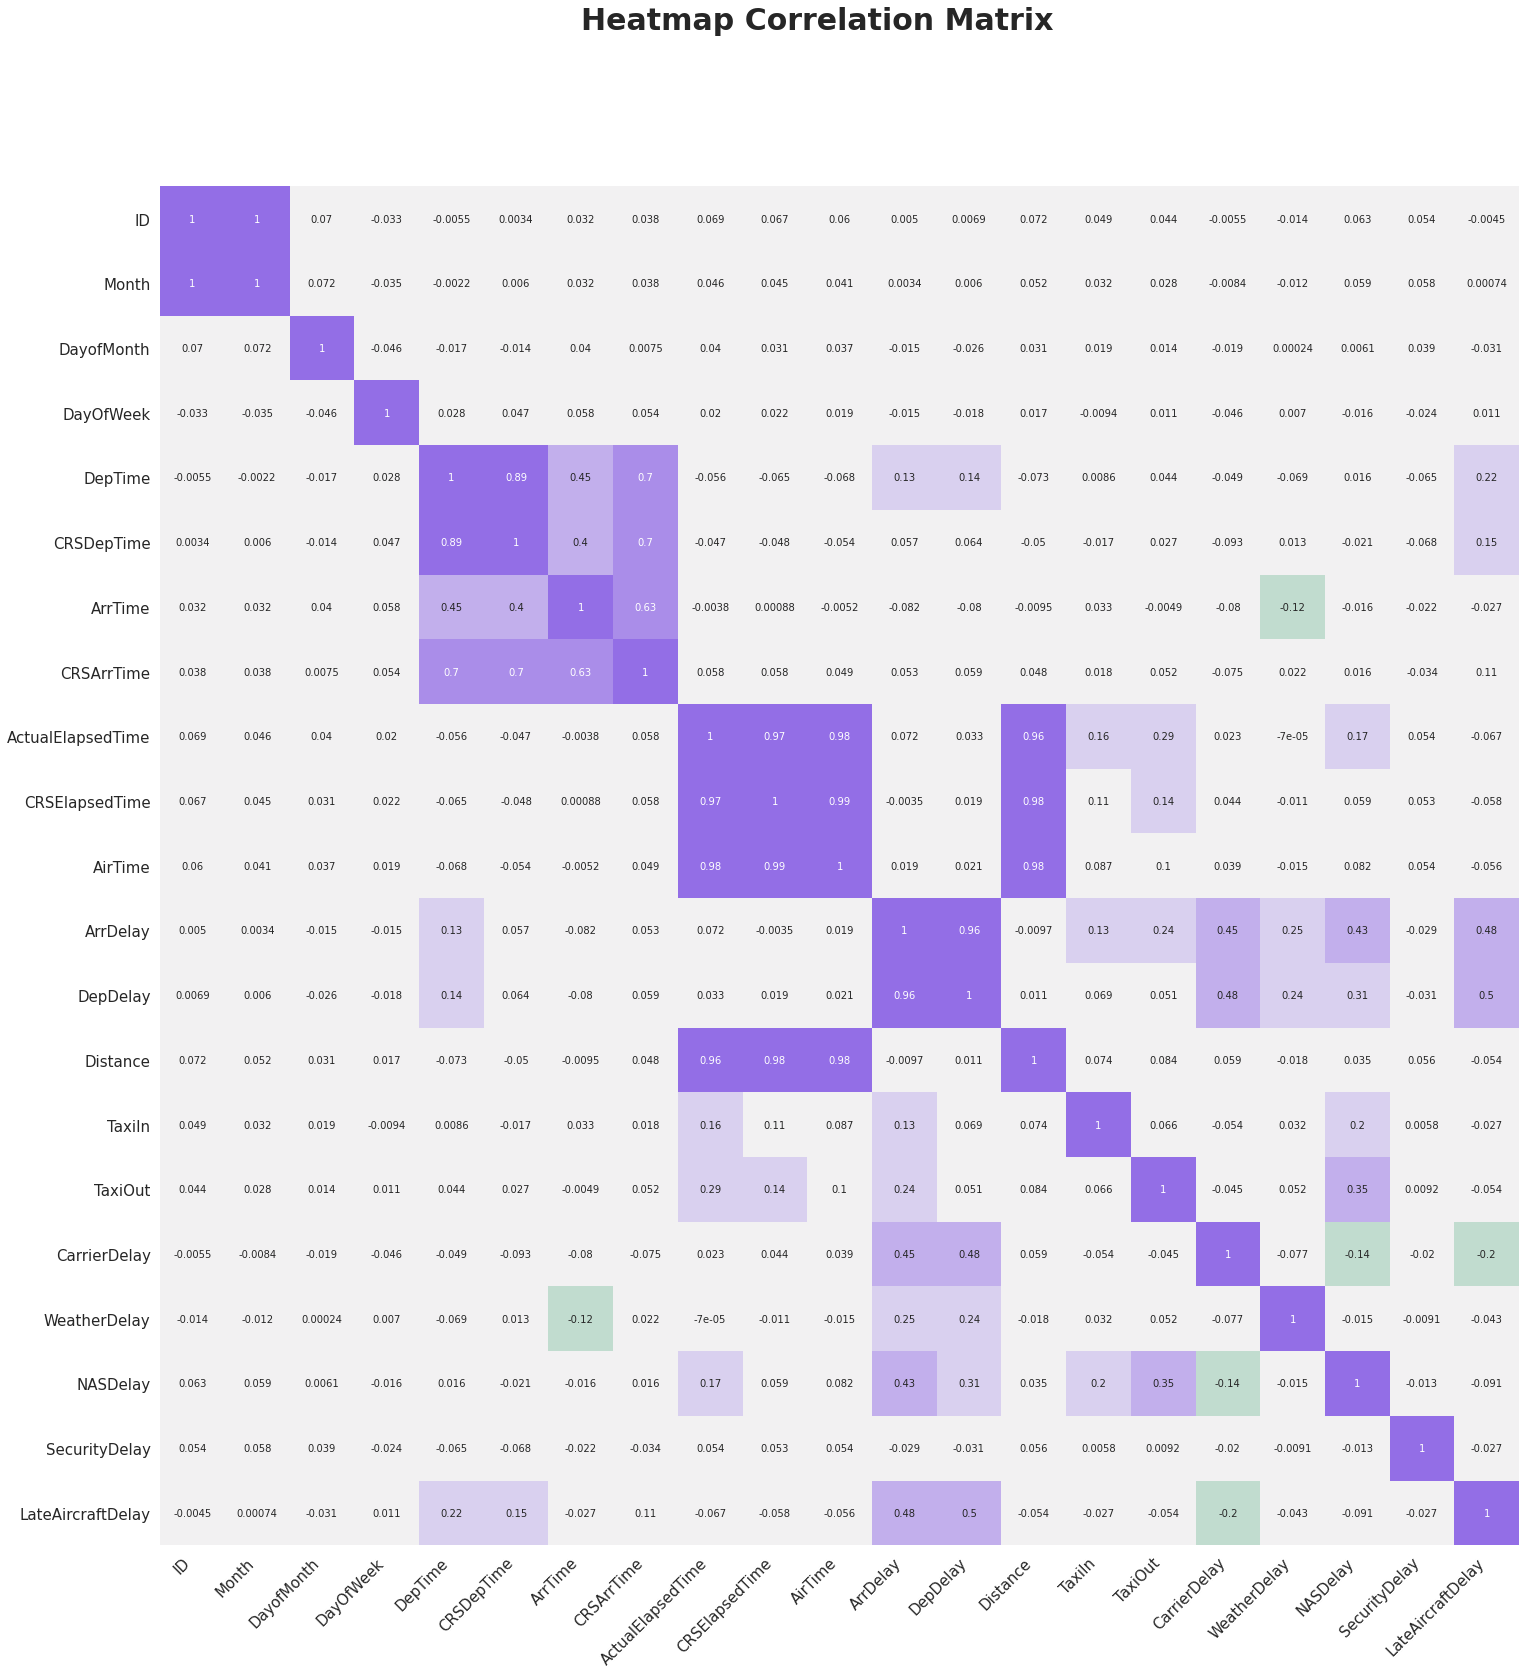

In [22]:
# Heatmap matrix of correlations
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25, 25))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 10},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(150, 275, s=80, l=55, n=9),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation = 0,
    horizontalalignment = 'right',
)
ax.tick_params(labelsize = 15)
fig.suptitle('Heatmap Correlation Matrix', fontsize = 30, fontweight = "bold")
plt.savefig("../reports/figures/Heatmap_Matrix_Correlations.png")

## Qualitative variables

In [23]:
# Qualitative variables (object type)
# ============================================================================
df.select_dtypes (include = ['object']). describe ()

UniqueCarrier TailNum Origin  Dest
count           1937    1937   1937  1937
unique            20    1559    180   186
top               WN  N776WN    ATL   ATL
freq             388       6    130   102

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

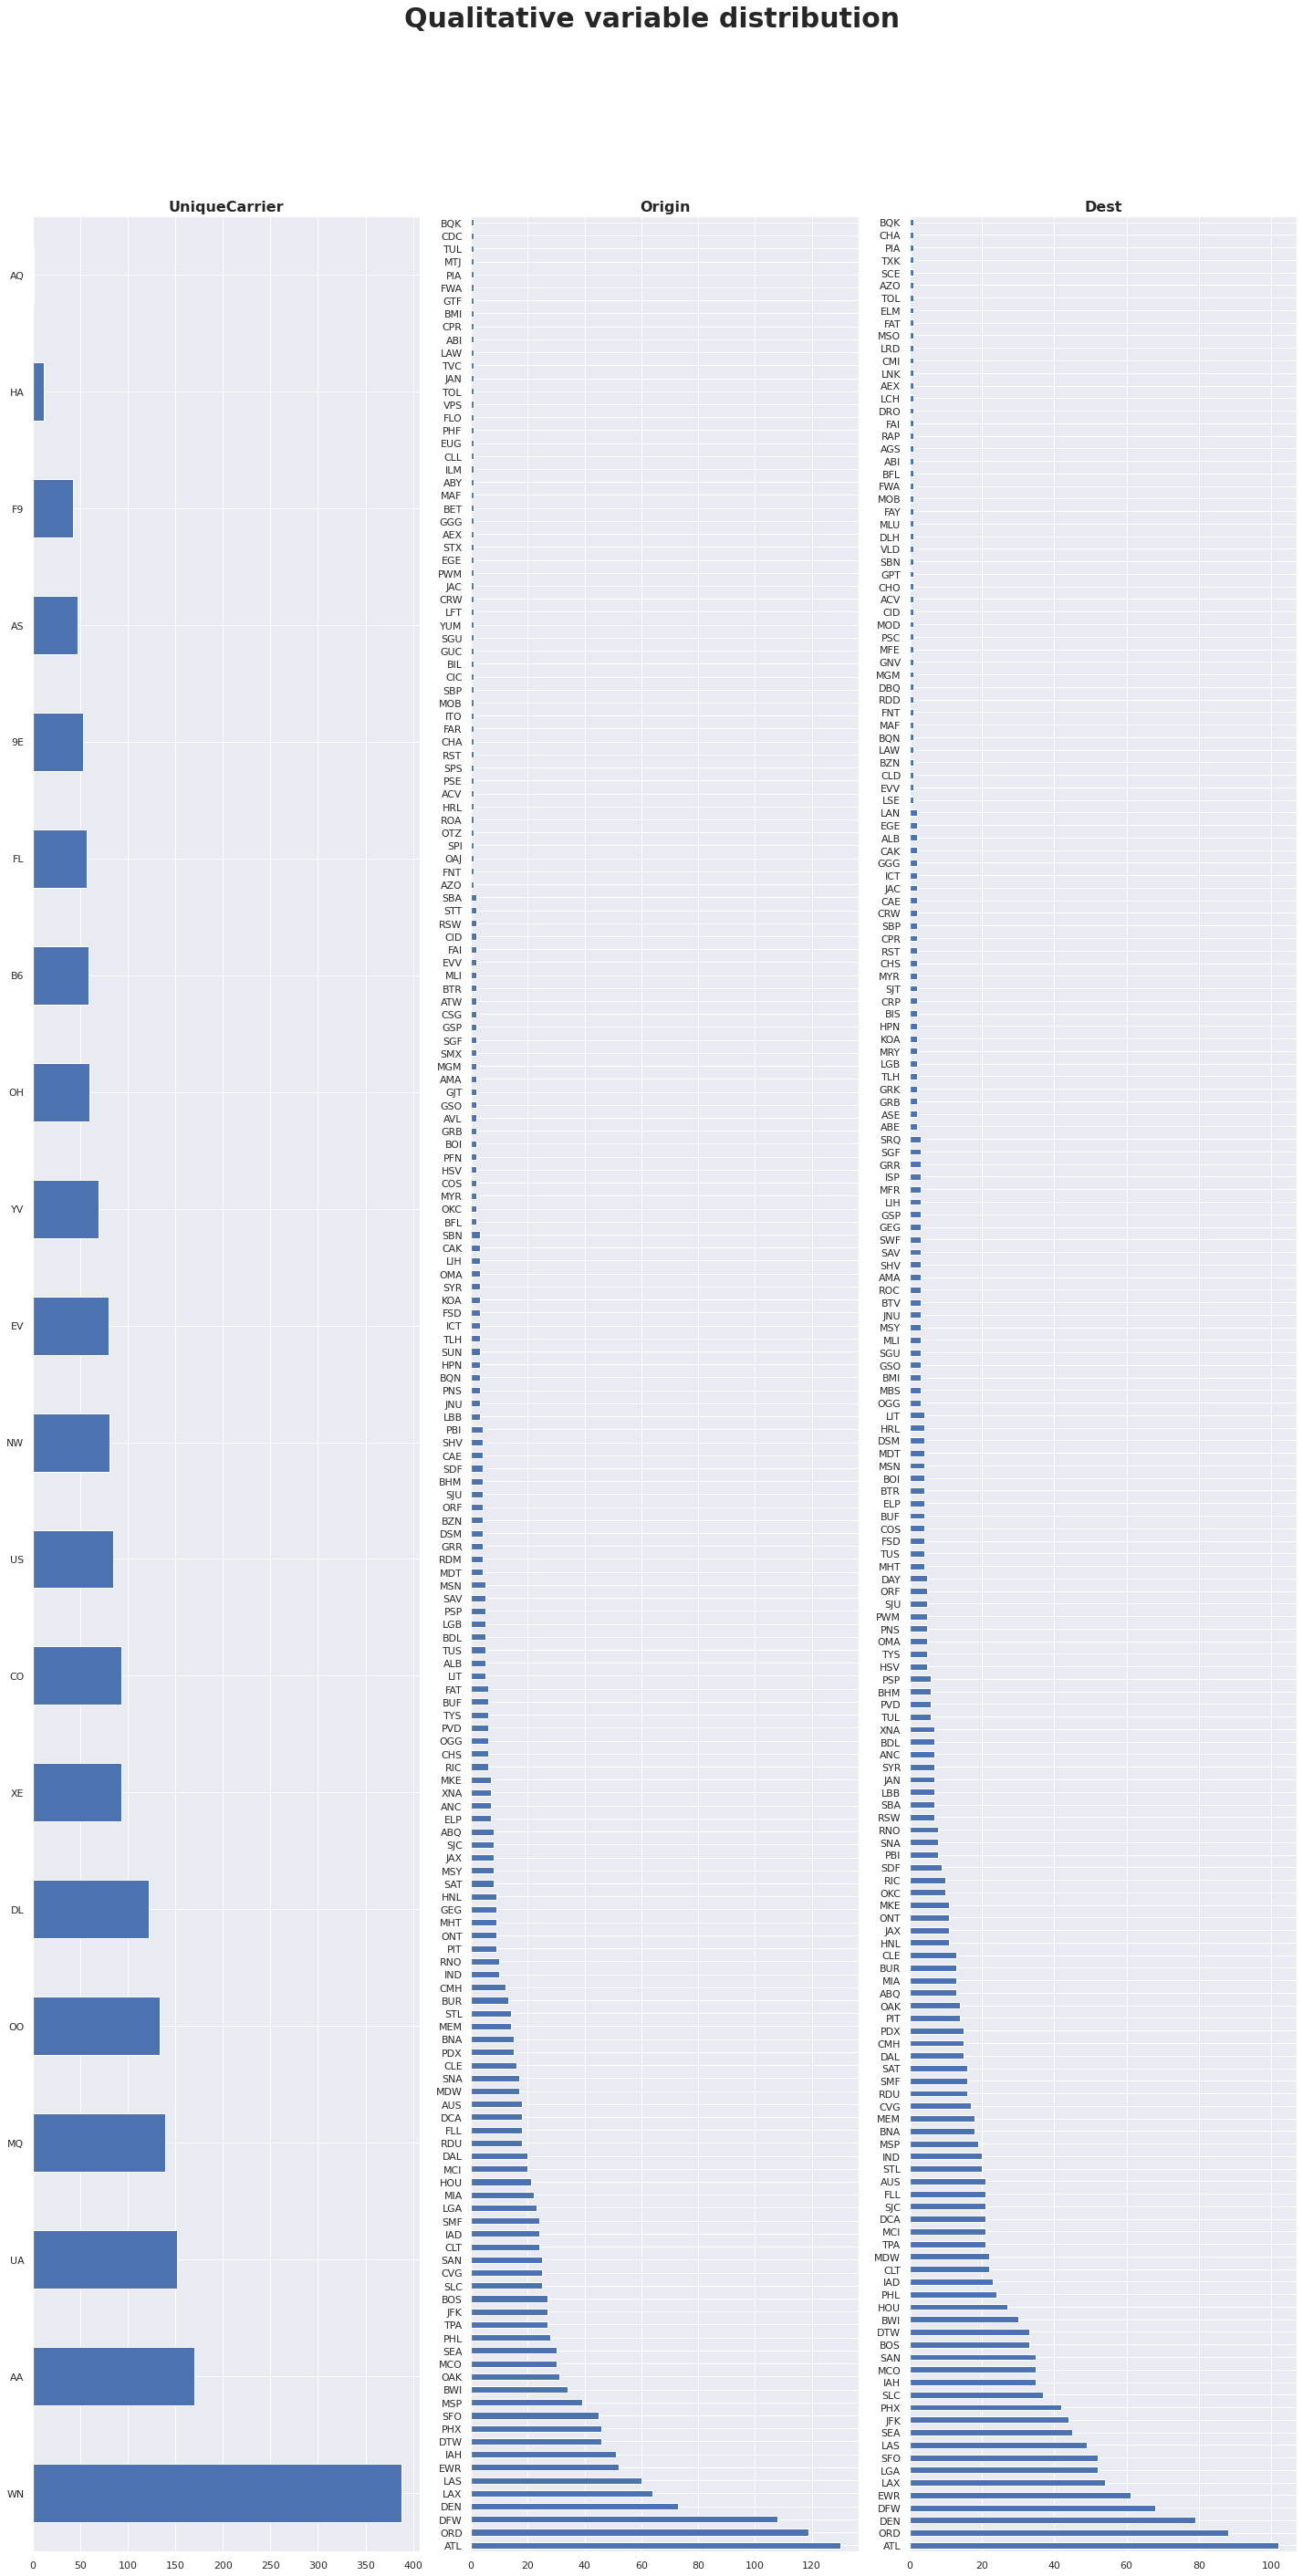

In [24]:
# Graph for each qualitative variable
# ==============================================================================
# Adjust number of subplots based on the number of columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 40))
axes = axes.flat
columnas_object = df.select_dtypes(include=['object']).columns
columnas_object = columnas_object.drop('TailNum')

for i, colum in enumerate(columnas_object):
    df[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 16, fontweight = "bold")
    axes[i].tick_params(labelsize = 11)
    axes[i].set_xlabel("")

# Empty axes are removed
"""for i in [7, 8]:
    fig.delaxes(axes[i])"""
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Qualitative variable distribution',
             fontsize = 30, fontweight = "bold")
plt.savefig("../reports/figures/Each_Qualtitative_Variable.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

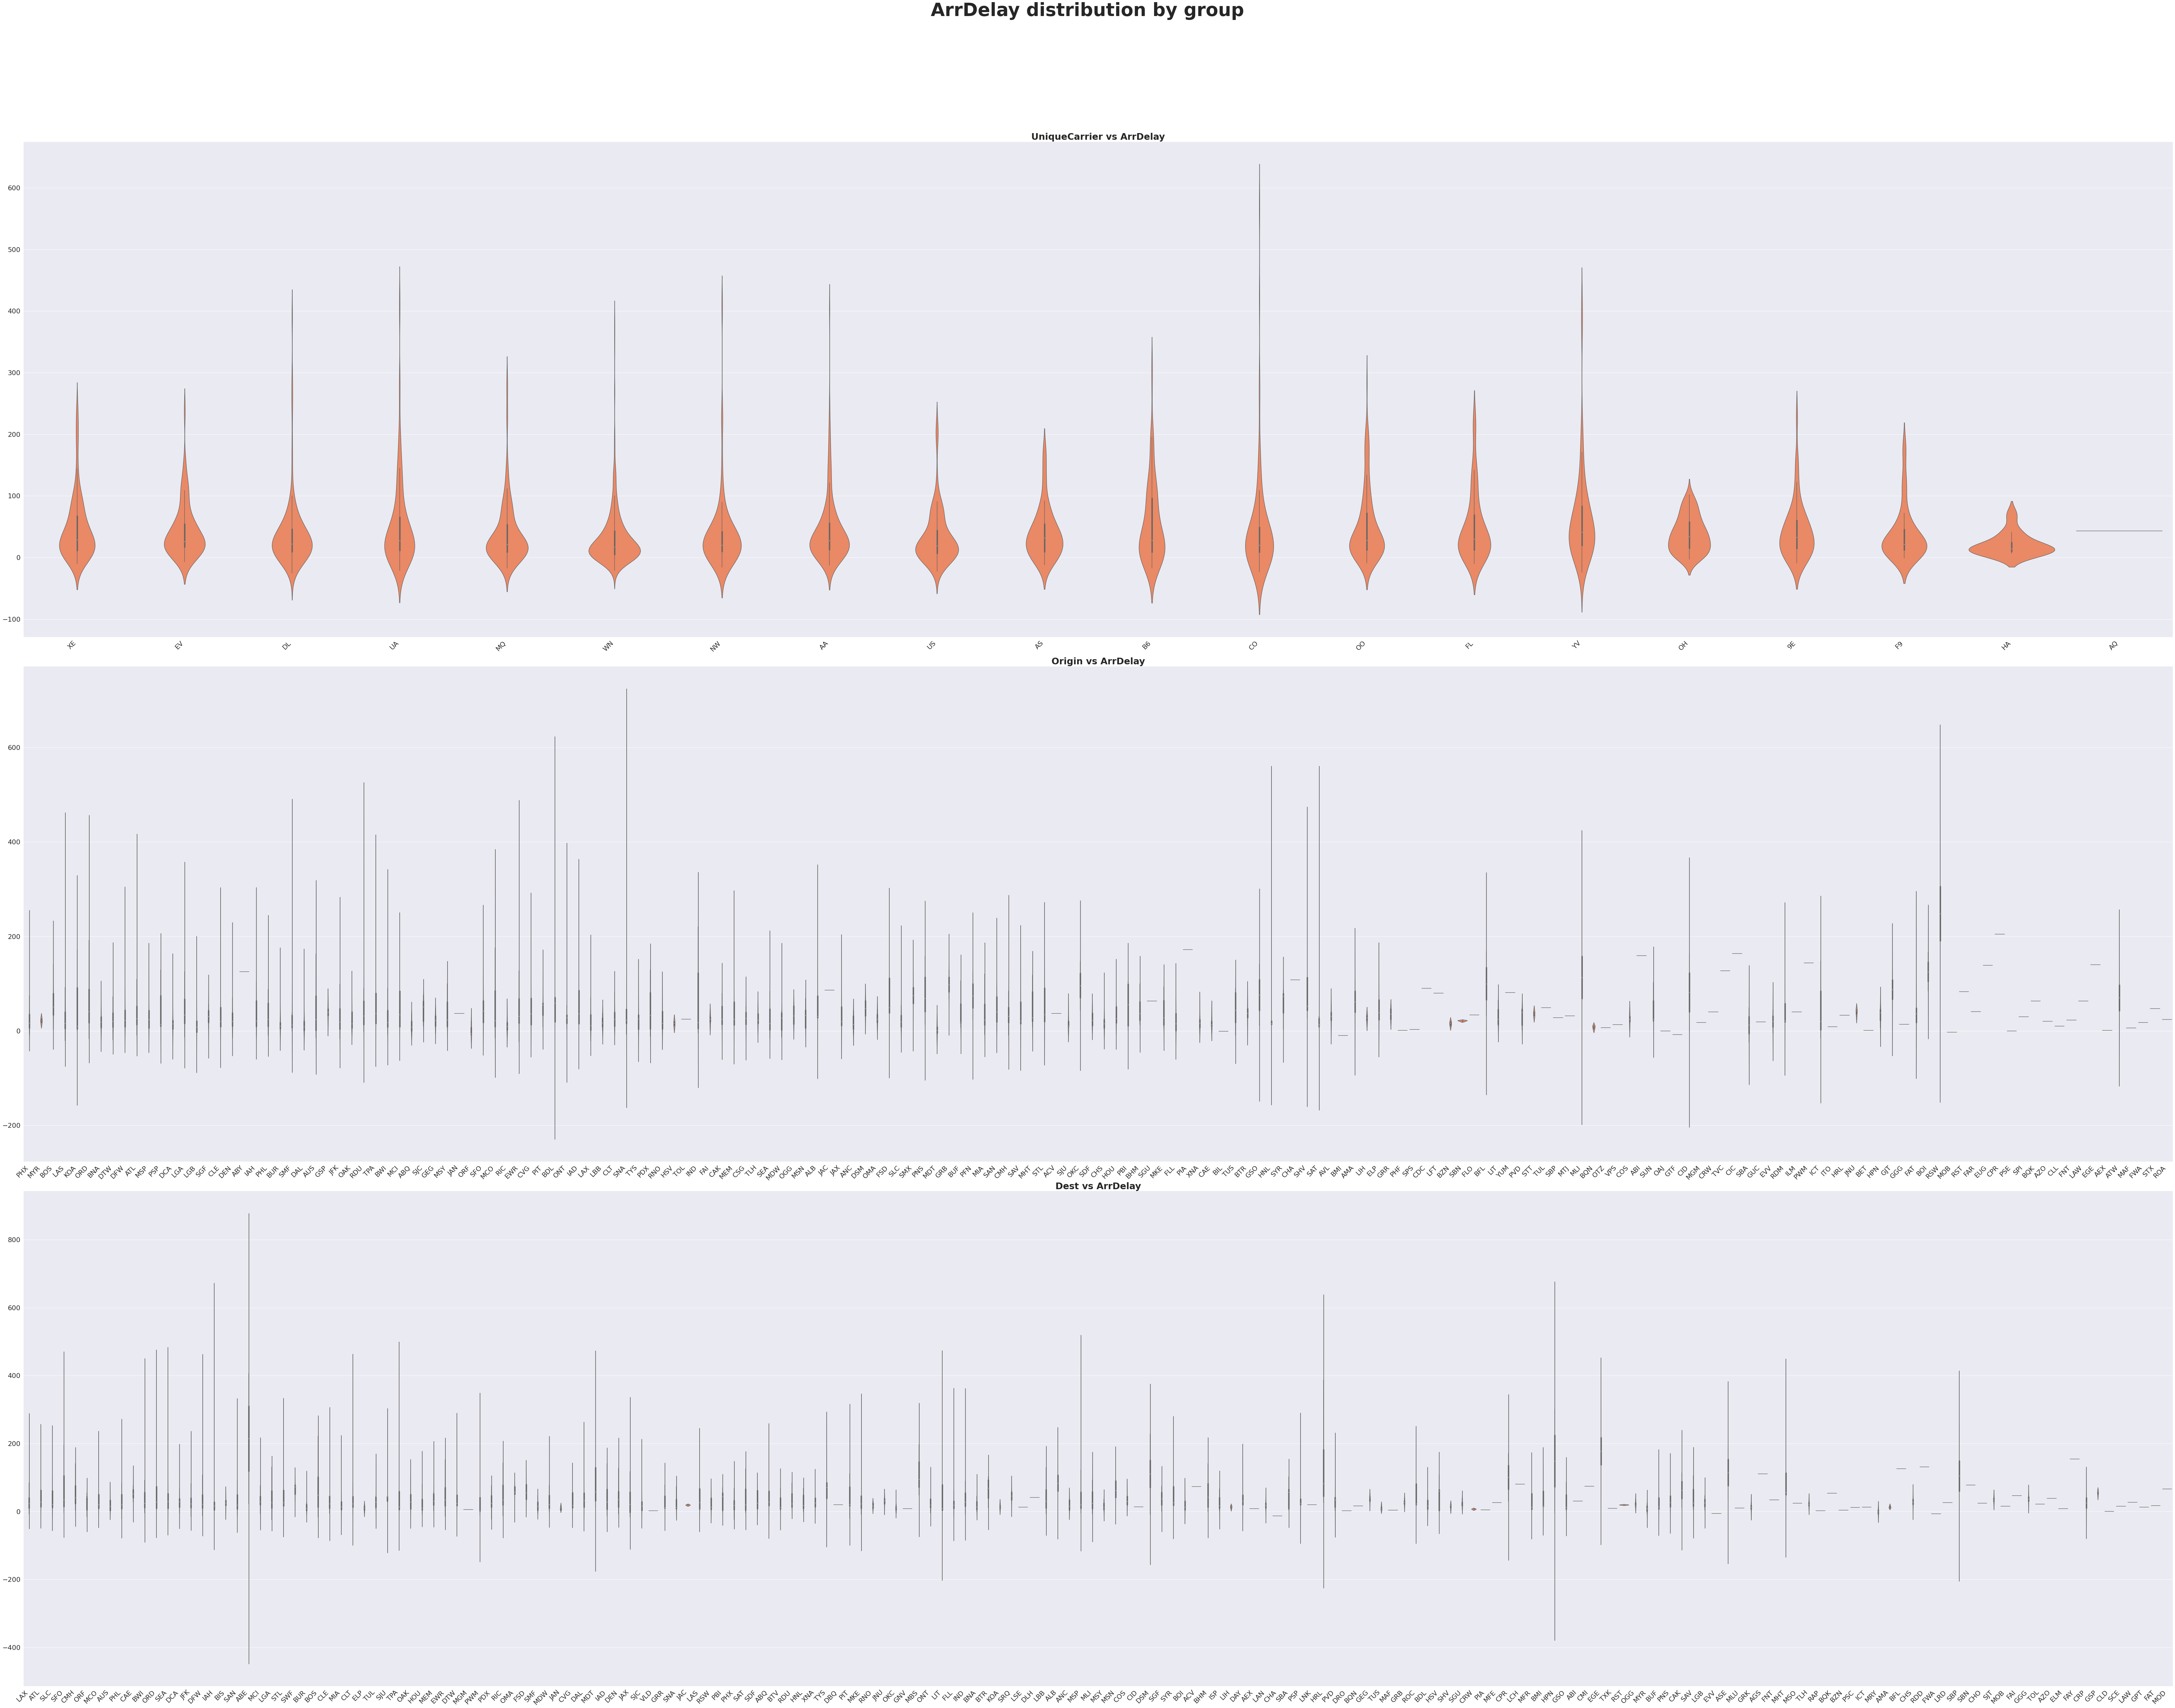

In [25]:
# Graph relationship between the ArrDelay and each qualitative variables
# ==============================================================================
# Adjust number of subplots based on the number of columns
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(100, 80))
axes = axes.flat
columnas_object = df.select_dtypes(include=['object']).columns
columnas_object = columnas_object.drop('TailNum')

for i, colum in enumerate(columnas_object):
    sns.violinplot(
        x     = colum,
        y     = 'ArrDelay',
        data  = df,
        color = "coral",
        ax    = axes[i]
    )
    axes[i].set_title(f"{colum} vs ArrDelay", fontsize = 30, fontweight = "bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 22)
    axes[i].set_xticklabels(axes[i].get_xticklabels(),rotation = 45, horizontalalignment = 'right')
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
# Empty axes are removed
"""for i in [7, 8]:
    fig.delaxes(axes[i])"""

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('ArrDelay distribution by group', fontsize = 60, fontweight = "bold")
plt.savefig("../reports/figures/ArrDelay_vs_Qualitative_Variable.png")

### Graph Pie chart's for each qualitative variables

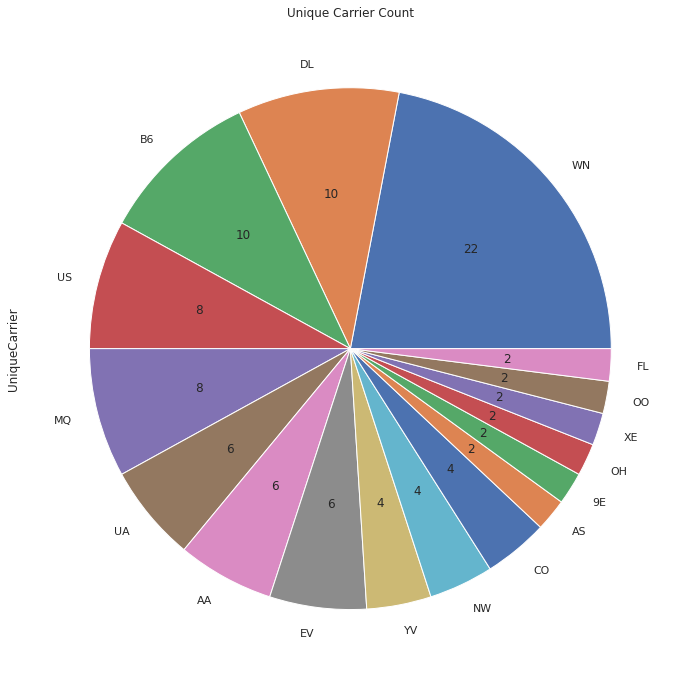

In [26]:
# Pie chart de UniqueCarrier
plot = df['UniqueCarrier'].head(50).value_counts().plot(kind='pie', autopct='%.0f', 
                                            figsize=(12, 12),
                                            title='Unique Carrier Count')

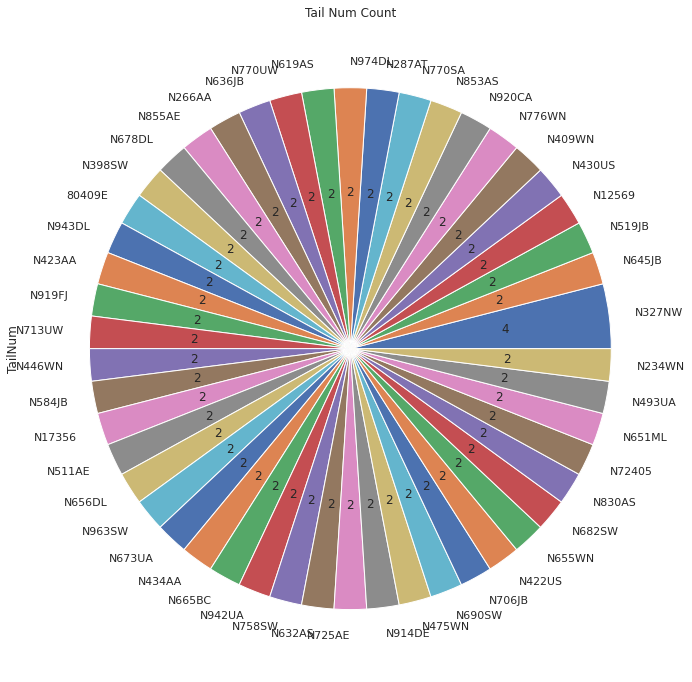

In [27]:
# Pie chart de UniqueCarrier
plot = df['TailNum'].head(50).value_counts().plot(kind='pie', autopct='%.0f', 
                                            figsize=(12, 12),
                                            title='Tail Num Count')

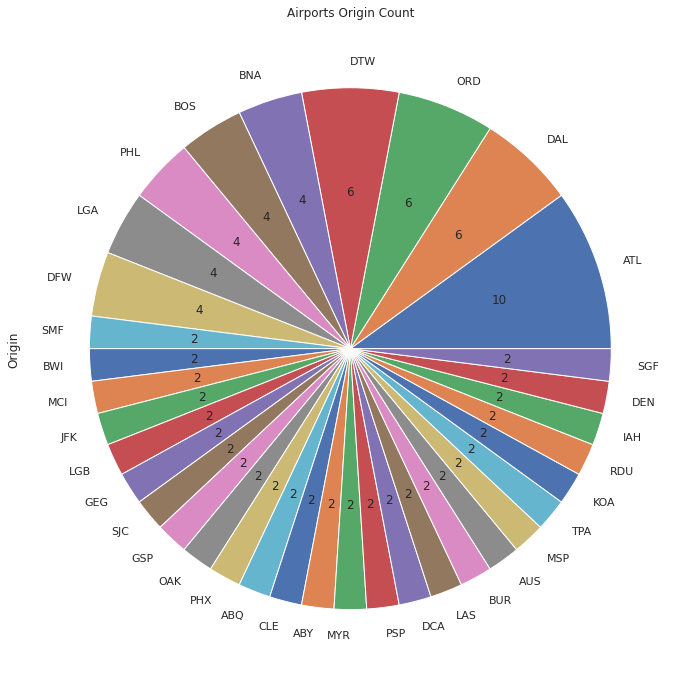

In [28]:
# Pie chart de Origin
plot = df['Origin'].head(50).value_counts().plot(kind='pie', autopct='%.0f', 
                                            figsize=(12, 12),
                                            title='Airports Origin Count')

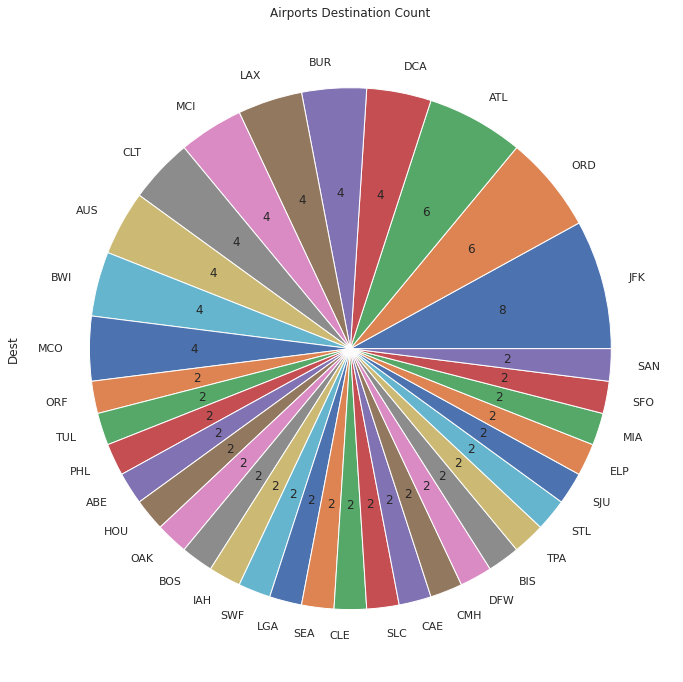

In [29]:
# Pie chart de Dest
plot = df['Dest'].head(50).value_counts().plot(kind='pie', autopct='%.0f', 
                                            figsize=(12, 12),
                                            title='Airports Destination Count')

## Remove duplicates

In [30]:
df.drop_duplicates(inplace=True)

## Transform Categorical Variables

In [31]:
# Frecuency encoding

labels = ['UniqueCarrier', 'TailNum', 'Origin', 'Dest']

for category in labels: 
    
    cat_map = df.groupby(category).size() / len(df)*100
    
    df[category] = df[category].map(cat_map)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1937 entries, 32721 to 693767
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1937 non-null   int64  
 1   Month              1937 non-null   int64  
 2   DayofMonth         1937 non-null   int64  
 3   DayOfWeek          1937 non-null   int64  
 4   DepTime            1937 non-null   float64
 5   CRSDepTime         1937 non-null   int64  
 6   ArrTime            1931 non-null   float64
 7   CRSArrTime         1937 non-null   int64  
 8   UniqueCarrier      1937 non-null   float64
 9   TailNum            1937 non-null   float64
 10  ActualElapsedTime  1931 non-null   float64
 11  CRSElapsedTime     1937 non-null   float64
 12  AirTime            1931 non-null   float64
 13  ArrDelay           1931 non-null   float64
 14  DepDelay           1937 non-null   float64
 15  Origin             1937 non-null   float64
 16  Dest              

## Imputation of missing values

In [33]:
df.isnull().sum().sum()

3371

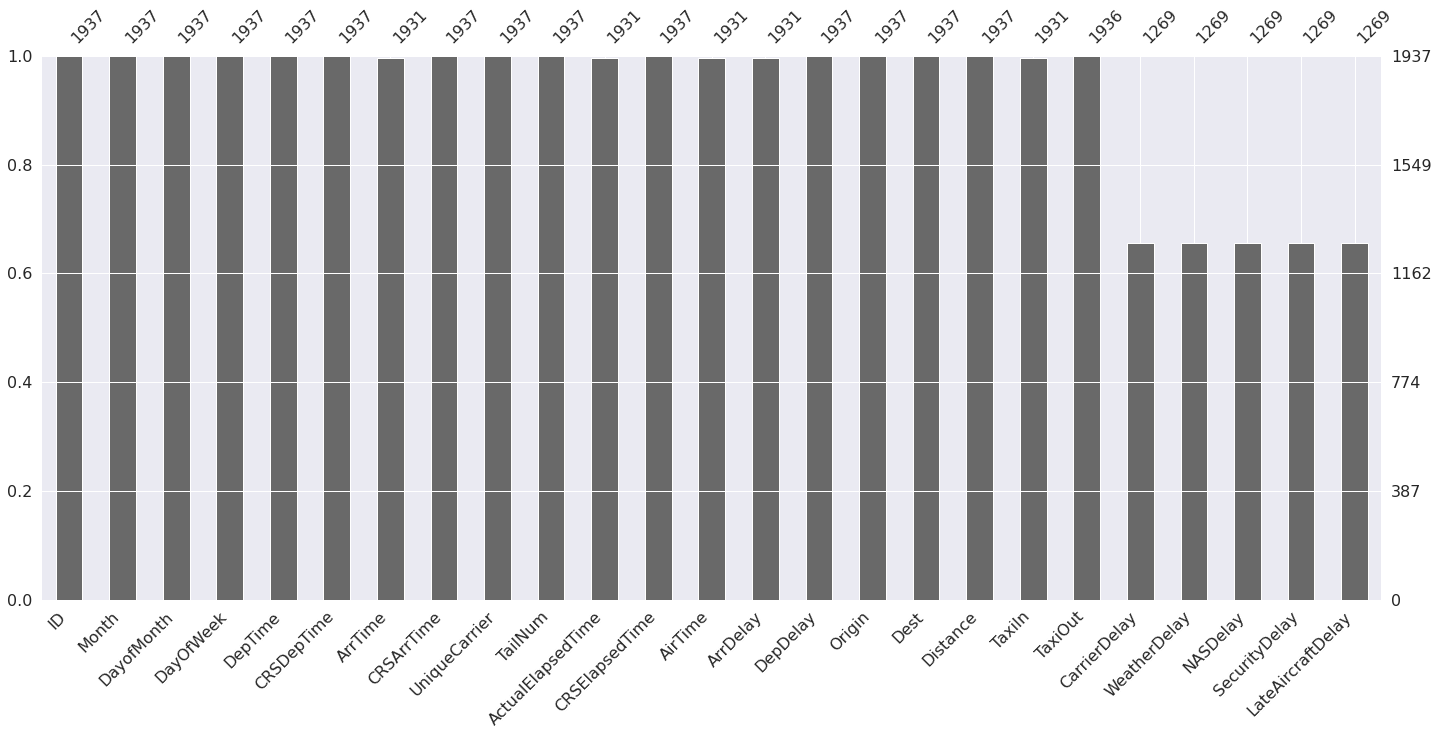

In [34]:
# Missing Values
msno.bar(df);

In [35]:
# Script created for transform missing data
# ===============================================================================
import missing

In [36]:
df[:] = missing.transform(df[:])

In [37]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [38]:
df.isna().any()

ID                   False
Month                False
DayofMonth           False
DayOfWeek            False
DepTime              False
CRSDepTime           False
ArrTime              False
CRSArrTime           False
UniqueCarrier        False
TailNum              False
ActualElapsedTime    False
CRSElapsedTime       False
AirTime              False
ArrDelay             False
DepDelay             False
Origin               False
Dest                 False
Distance             False
TaxiIn               False
TaxiOut              False
CarrierDelay         False
WeatherDelay         False
NASDelay             False
SecurityDelay        False
LateAircraftDelay    False
dtype: bool

In [39]:
df.to_csv(path + "processed/DelayedFlightsProcessed.csv", index = False, header = True)

*****************************************************************************
*****************************************************************************
*****************************************************************************
*****************************************************************************

# PCA

In [40]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

<IPython.core.display.Javascript object>

array([[-1.47153643, -1.69772865, -1.01287157, ..., -0.51979943,
        -0.058027  ,  1.6443371 ],
       [-0.9042994 ,  0.50566055,  0.01056726, ...,  0.09011779,
        -0.058027  , -0.7256083 ],
       [-0.33706237, -1.23385724, -1.52459098, ...,  0.15788637,
        -0.058027  , -0.7256083 ],
       ...,
       [-1.47153643,  0.27372484,  0.52228667, ..., -0.01153508,
        -0.058027  , -0.7256083 ],
       [-1.47153643, -0.76998583, -0.50115216, ..., -0.51979943,
        -0.058027  ,  0.35695935],
       [-0.62068089, -0.42208227,  1.03400608, ..., -0.11318795,
        -0.058027  ,  0.73732096]])

In [41]:
pca = PCA(n_components= 3)
principalComponents = pca.fit_transform(X)

<IPython.core.display.Javascript object>

In [42]:
print(pca.explained_variance_ratio_)

[0.50824542 0.27345885 0.14723214]


## Plot the variations for each PC

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

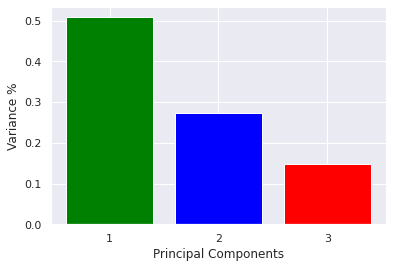

In [43]:
PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color=('green', 'blue', 'red'))
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC);

## Create a dataframe of the components

In [44]:
PCA_components = pd.DataFrame(data= principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
PCA_components.head()

<IPython.core.display.Javascript object>

principal component 1  principal component 2  principal component 3
0             466.419289            -415.399646             -39.356893
1            -523.522600            -404.861482             -74.536857
2            1459.539018            1370.667238            -181.584072
3            -202.848225            -518.079918             -40.025446
4            -420.034300            1704.779232            -524.782081

# Clustering with K-Means

### Finding the optimal number of clusters

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

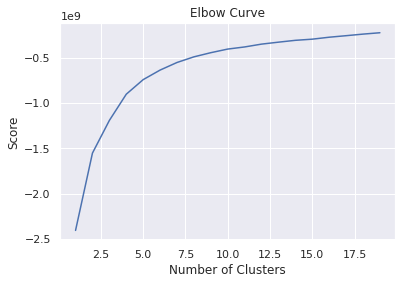

In [45]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

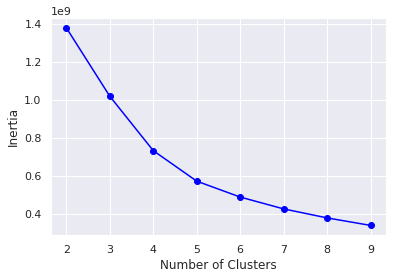

In [46]:
ks= range (2,10)
inertias= []

for k in ks:
    model= KMeans(n_clusters= k)
    model.fit(PCA_components)
    inertias.append(model.inertia_)
    
    
plt.plot(ks, inertias, '-o', color= 'blue')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

## Execute the Kmeans model with 4 clusters and adjust it to the components of the pca

In [47]:
k_means_pca = KMeans(init = "k-means++", n_clusters = 4, n_init = 12, random_state=42).fit(PCA_components)

<IPython.core.display.Javascript object>

## Verify the labels of the clustering

In [48]:
labels_pca = k_means_pca.labels_
labels_pca
clusters_pca = pd.concat([PCA_components, pd.DataFrame({'pca_clusters':labels_pca})], axis=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Create the graph of the components

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

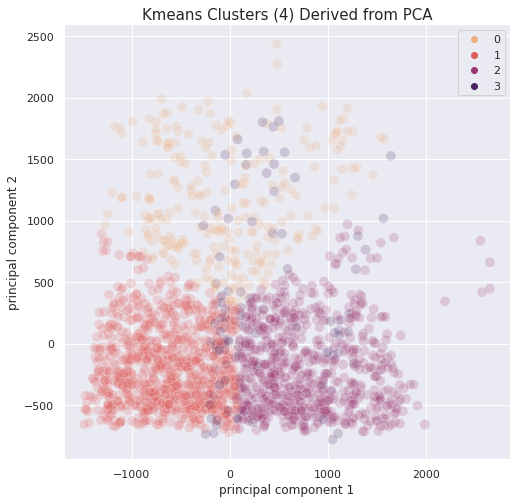

In [57]:
plt.figure(figsize=(8,8))

sns.scatterplot(clusters_pca.iloc[:,0], clusters_pca.iloc[:,1],
               hue = labels_pca, palette= "flare", s=100,
               alpha=0.2).set_title('Kmeans Clusters (4) Derived from PCA',
                                   fontsize=15)

plt.legend()
plt.show()

## Insert the Components in the Dataframe

In [58]:
df_pca_kmeans = pd.concat([df.reset_index(drop=True), 
                          PCA_components], axis=1)

df_pca_kmeans.head()

<IPython.core.display.Javascript object>

ID  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0   101064.0    1.0         1.0        2.0   1402.0      1230.0   1417.0   
1  1507815.0    3.0        20.0        4.0   1723.0      1715.0   1932.0   
2  2980060.0    5.0         5.0        1.0    703.0       650.0   1031.0   
3  6158470.0   11.0         8.0        6.0   1628.0      1559.0   1731.0   
4  5039080.0    9.0        26.0        5.0   1526.0      1230.0   2322.0   

   CRSArrTime  UniqueCarrier   TailNum  ActualElapsedTime  CRSElapsedTime  \
0      1256.0       4.801239  0.051626               75.0            86.0   
1      1906.0       4.130098  0.051626              129.0           111.0   
2      1011.0       6.298400  0.051626              328.0           321.0   
3      1715.0       7.847186  0.051626               63.0            76.0   
4      2029.0       7.847186  0.051626              296.0           299.0   

   AirTime  ArrDelay  DepDelay    Origin      Dest  Distance  TaxiIn  TaxiOut  \
0     56.0      81.0      92.0  2.374806  2.787816     370.0     6.0     13.0   
1    100.0      26.0       8.0  0.103252  5.265875     317.0    12.0     17.0   
2    302.0      20.0      13.0  1.393908  1.910170    2105.0     8.0     18.0   
3     42.0      16.0      29.0  3.097574  2.787816     236.0     7.0     14.0   
4    280.0     173.0     176.0  0.154879  2.684564    2367.0     6.0     10.0   

   CarrierDelay  WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay  \
0           0.0           0.0       0.0            0.0               81.0   
1           8.0           0.0      18.0            0.0                0.0   
2           0.0           0.0      20.0            0.0                0.0   
3           0.0           0.0       0.0            0.0               16.0   
4           0.0           0.0       0.0            0.0              173.0   

   principal component 1  principal component 2  principal component 3  
0             466.419289            -415.399646             -39.356893  
1            -523.522600            -404.861482             -74.536857  
2            1459.539018            1370.667238            -181.584072  
3            -202.848225            -518.079918             -40.025446  
4            -420.034300            1704.779232            -524.782081

## Add the labels of the clustering

In [59]:
df_pca_kmeans['Kmeans PCA'] = labels_pca
df_pca_kmeans.head()

ID  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0   101064.0    1.0         1.0        2.0   1402.0      1230.0   1417.0   
1  1507815.0    3.0        20.0        4.0   1723.0      1715.0   1932.0   
2  2980060.0    5.0         5.0        1.0    703.0       650.0   1031.0   
3  6158470.0   11.0         8.0        6.0   1628.0      1559.0   1731.0   
4  5039080.0    9.0        26.0        5.0   1526.0      1230.0   2322.0   

   CRSArrTime  UniqueCarrier   TailNum  ActualElapsedTime  CRSElapsedTime  \
0      1256.0       4.801239  0.051626               75.0            86.0   
1      1906.0       4.130098  0.051626              129.0           111.0   
2      1011.0       6.298400  0.051626              328.0           321.0   
3      1715.0       7.847186  0.051626               63.0            76.0   
4      2029.0       7.847186  0.051626              296.0           299.0   

   AirTime  ArrDelay  DepDelay    Origin      Dest  Distance  TaxiIn  TaxiOut  \
0     56.0      81.0      92.0  2.374806  2.787816     370.0     6.0     13.0   
1    100.0      26.0       8.0  0.103252  5.265875     317.0    12.0     17.0   
2    302.0      20.0      13.0  1.393908  1.910170    2105.0     8.0     18.0   
3     42.0      16.0      29.0  3.097574  2.787816     236.0     7.0     14.0   
4    280.0     173.0     176.0  0.154879  2.684564    2367.0     6.0     10.0   

   CarrierDelay  WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay  \
0           0.0           0.0       0.0            0.0               81.0   
1           8.0           0.0      18.0            0.0                0.0   
2           0.0           0.0      20.0            0.0                0.0   
3           0.0           0.0       0.0            0.0               16.0   
4           0.0           0.0       0.0            0.0              173.0   

   principal component 1  principal component 2  principal component 3  \
0             466.419289            -415.399646             -39.356893   
1            -523.522600            -404.861482             -74.536857   
2            1459.539018            1370.667238            -181.584072   
3            -202.848225            -518.079918             -40.025446   
4            -420.034300            1704.779232            -524.782081   

   Kmeans PCA  
0           2  
1           1  
2           0  
3           1  
4           0

## Check de Cllusters

In [60]:
df_cluster_0 = df_pca_kmeans.loc[df_pca_kmeans['Kmeans PCA'] == 0]
df_cluster_0.head()

ID  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
2   2980060.0    5.0         5.0        1.0    703.0       650.0   1031.0   
4   5039080.0    9.0        26.0        5.0   1526.0      1230.0   2322.0   
16  6420900.0   11.0        20.0        4.0   1059.0       850.0   1906.0   
23  4168982.0    7.0        10.0        4.0   1146.0      1135.0   2016.0   
33  6421333.0   11.0        21.0        5.0   1807.0      1759.0   2142.0   

    CRSArrTime  UniqueCarrier   TailNum  ActualElapsedTime  CRSElapsedTime  \
2       1011.0       6.298400  0.051626              328.0           321.0   
4       2029.0       7.847186  0.051626              296.0           299.0   
16      1704.0       3.045947  0.051626              307.0           314.0   
23      2006.0       3.045947  0.051626              330.0           331.0   
33      2139.0       3.045947  0.051626              395.0           400.0   

    AirTime  ArrDelay  DepDelay    Origin      Dest  Distance  TaxiIn  \
2     302.0      20.0      13.0  1.393908  1.910170    2105.0     8.0   
4     280.0     173.0     176.0  0.154879  2.684564    2367.0     6.0   
16    288.0     122.0     129.0  0.258131  2.271554    2465.0     9.0   
23    301.0      10.0      11.0  0.671141  2.271554    2465.0     8.0   
33    350.0       3.0       8.0  1.393908  0.671141    2465.0     2.0   

    TaxiOut  CarrierDelay  WeatherDelay   NASDelay  SecurityDelay  \
2      18.0      0.000000      0.000000  20.000000       0.000000   
4      10.0      0.000000      0.000000   0.000000       0.000000   
16     10.0     19.000000      0.000000   0.000000       0.000000   
23     21.0     18.381403      4.008668  15.340426       0.043341   
33     43.0     18.381403      4.008668  15.340426       0.043341   

    LateAircraftDelay  principal component 1  principal component 2  \
2            0.000000            1459.539018            1370.667238   
4          173.000000            -420.034300            1704.779232   
16         103.000000             374.625062            1791.433458   
23          24.799842             -10.776522            1814.975104   
33          24.799842            -748.521990            1803.308366   

    principal component 3  Kmeans PCA  
2             -181.584072           0  
4             -524.782081           0  
16            -573.789779           0  
23            -490.778856           0  
33             -24.089018           0

In [61]:
df_cluster_0.describe()

ID       Month  DayofMonth   DayOfWeek      DepTime  \
count  2.420000e+02  242.000000  242.000000  242.000000   242.000000   
mean   3.660706e+06    6.541322   16.785124    4.086777  1406.661157   
std    1.943949e+06    3.279565    8.363333    1.918655   375.042538   
min    2.322700e+04    1.000000    1.000000    1.000000    58.000000   
25%    2.093001e+06    4.000000    9.250000    3.000000  1205.500000   
50%    3.598970e+06    6.500000   17.000000    4.000000  1434.500000   
75%    5.352366e+06    9.000000   24.000000    6.000000  1711.750000   
max    6.998338e+06   12.000000   31.000000    7.000000  2142.000000   

        CRSDepTime      ArrTime   CRSArrTime  UniqueCarrier     TailNum  \
count   242.000000   242.000000   242.000000     242.000000  242.000000   
mean   1375.694215  1833.408449  1775.714876       8.062438    0.069119   
std     356.605745   350.201180   347.170324       5.480355    0.032620   
min     630.000000   356.000000   503.000000       0.051626    0.051626   
25%    1130.250000  1635.750000  1605.250000       4.388229    0.051626   
50%    1358.000000  1903.500000  1829.500000       6.298400    0.051626   
75%    1645.000000  2112.500000  2035.000000       8.776458    0.103252   
max    2353.000000  2345.000000  2340.000000      20.030976    0.309757   

       ActualElapsedTime  CRSElapsedTime     AirTime    ArrDelay    DepDelay  \
count         242.000000      242.000000  242.000000  242.000000  242.000000   
mean          261.218490      265.723140  234.633066   39.266421   42.537190   
std            57.473503       56.116892   54.078641   64.687307   64.359344   
min           130.874676      155.000000  106.201968  -23.000000    6.000000   
25%           218.000000      224.000000  196.250000    8.000000   13.000000   
50%           253.000000      253.000000  224.000000   23.000000   22.000000   
75%           302.750000      310.000000  279.750000   49.000000   47.750000   
max           441.000000      400.000000  370.000000  569.000000  571.000000   

           Origin        Dest     Distance      TaxiIn     TaxiOut  \
count  242.000000  242.000000   242.000000  242.000000  242.000000   
mean     2.453739    2.089369  1856.446281    6.866472   19.780992   
std      1.717879    1.131613   442.904445    3.557345   13.904743   
min      0.103252    0.051626  1065.000000    1.000000    6.000000   
25%      1.239029    1.135777  1504.500000    4.250000   12.000000   
50%      2.323180    2.168301  1750.500000    6.000000   15.000000   
75%      3.097574    2.684564  2274.250000    8.000000   23.000000   
max      6.711409    5.265875  3329.000000   29.000000  107.000000   

       CarrierDelay  WeatherDelay    NASDelay  SecurityDelay  \
count    242.000000    242.000000  242.000000     242.000000   
mean      22.498792      2.767722   16.450325       0.119604   
std       52.305572      7.121800   33.135552       1.606146   
min        0.000000      0.000000    0.000000       0.000000   
25%        0.000000      0.000000    0.000000       0.000000   
50%       18.381403      0.000000   15.340426       0.000000   
75%       18.381403      4.008668   15.340426       0.043341   
max      569.000000     60.000000  421.000000      25.000000   

       LateAircraftDelay  principal component 1  principal component 2  \
count         242.000000             242.000000             242.000000   
mean           20.300767             -47.041885            1152.541825   
std            23.837678             627.883195             448.988953   
min             0.000000           -1268.607255             335.216027   
25%             0.000000            -559.742529             796.019226   
50%            24.799842             -98.999527            1062.842855   
75%            24.799842             347.290928            1573.874414   
max           173.000000            1572.098501            2434.695646   

       principal component 3  Kmeans PCA  
count             242.000000       242.0  
mean      

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

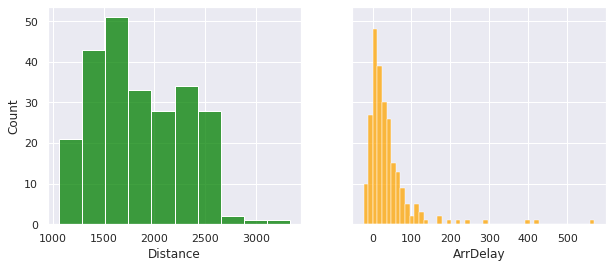

In [64]:
sns.set(style="darkgrid")


fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=(10, 4))
sns.histplot(data=df_cluster_0, x="Distance",color="green", ax=ax1 , bins=10)
sns.histplot(data=df_cluster_0, x="ArrDelay",color="orange", ax=ax2, bins=50);

In [65]:
df_cluster_1 = df_pca_kmeans.loc[df_pca_kmeans['Kmeans PCA'] == 1]
df_cluster_1.head()

ID  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
1  1507815.0    3.0        20.0        4.0   1723.0      1715.0   1932.0   
3  6158470.0   11.0         8.0        6.0   1628.0      1559.0   1731.0   
5  2799351.0    5.0         5.0        1.0   1547.0      1525.0   1800.0   
6  6549953.0   12.0        30.0        2.0   1952.0      1940.0   2219.0   
8  6939849.0   12.0        24.0        3.0   1845.0      1835.0   1941.0   

   CRSArrTime  UniqueCarrier   TailNum  ActualElapsedTime  CRSElapsedTime  \
1      1906.0       4.130098  0.051626              129.0           111.0   
3      1715.0       7.847186  0.051626               63.0            76.0   
5      1740.0       7.176045  0.051626               73.0            75.0   
6      2235.0      20.030976  0.154879               87.0           115.0   
8      1935.0       8.776458  0.051626               56.0            60.0   

   AirTime  ArrDelay  DepDelay    Origin      Dest  Distance  TaxiIn  TaxiOut  \
1    100.0      26.0       8.0  0.103252  5.265875     317.0    12.0     17.0   
3     42.0      16.0      29.0  3.097574  2.787816     236.0     7.0     14.0   
5     45.0      20.0      22.0  6.143521  0.774393     296.0     4.0     24.0   
6     75.0     -16.0      12.0  0.774393  0.258131     585.0     4.0      8.0   
8     37.0       6.0      10.0  5.575632  1.084151     190.0     3.0     16.0   

   CarrierDelay  WeatherDelay   NASDelay  SecurityDelay  LateAircraftDelay  \
1      8.000000      0.000000  18.000000       0.000000           0.000000   
3      0.000000      0.000000   0.000000       0.000000          16.000000   
5      5.000000      0.000000   0.000000       0.000000          15.000000   
6     18.381403      4.008668  15.340426       0.043341          24.799842   
8     18.381403      4.008668  15.340426       0.043341          24.799842   

   principal component 1  principal component 2  principal component 3  \
1            -523.522600            -404.861482             -74.536857   
3            -202.848225            -518.079918             -40.025446   
5            -196.425186            -448.047828            -138.522152   
6           -1053.443104            -128.192690             -73.550105   
8            -661.198870            -556.592374              14.709724   

   Kmeans PCA  
1           1  
3           1  
5           1  
6           1  
8           1

In [66]:
df_cluster_1.describe()

ID       Month  DayofMonth   DayOfWeek      DepTime  \
count  9.130000e+02  913.000000  913.000000  913.000000   913.000000   
mean   3.409393e+06    6.256298   15.532311    4.094195  1816.447974   
std    2.091658e+06    3.525289    8.681454    1.932495   211.296400   
min    1.682000e+03    1.000000    1.000000    1.000000  1353.000000   
25%    1.525965e+06    3.000000    8.000000    2.000000  1637.000000   
50%    3.319302e+06    6.000000   15.000000    4.000000  1818.000000   
75%    5.171859e+06    9.000000   23.000000    5.000000  2000.000000   
max    7.007686e+06   12.000000   31.000000    7.000000  2308.000000   

        CRSDepTime      ArrTime   CRSArrTime  UniqueCarrier     TailNum  \
count   913.000000   913.000000   913.000000     913.000000  913.000000   
mean   1742.937568  1995.058635  1922.731654       8.574816    0.077807   
std     214.876100   212.270104   225.184503       6.302991    0.038614   
min    1107.000000  1601.000000     5.000000       0.619515    0.051626   
25%    1555.000000  1821.000000  1742.000000       4.130098    0.051626   
50%    1735.000000  2009.000000  1925.000000       6.917914    0.051626   
75%    1915.000000  2156.000000  2110.000000       8.776458    0.103252   
max    2253.000000  2359.000000  2357.000000      20.030976    0.309757   

       ActualElapsedTime  CRSElapsedTime     AirTime    ArrDelay    DepDelay  \
count         913.000000      913.000000  913.000000  913.000000  913.000000   
mean          107.323794      108.205915   82.744366   43.277570   44.507119   
std            42.814782       40.352521   38.013795   51.119587   47.817157   
min            32.000000       32.000000   14.000000  -21.000000    6.000000   
25%            73.000000       75.000000   52.000000   10.000000   13.000000   
50%           103.000000      101.000000   76.000000   26.000000   27.000000   
75%           135.000000      138.000000  109.000000   59.000000   58.000000   
max           295.000000      255.000000  220.000000  406.000000  396.000000   

           Origin        Dest     Distance      TaxiIn     TaxiOut  \
count  913.000000  913.000000   913.000000  913.000000  913.000000   
mean     2.315716    1.782434   547.111720    6.800721   17.812705   
std      2.159061    1.530823   302.988848    5.108584   13.334305   
min      0.051626    0.051626    45.000000    1.000000    1.000000   
25%      0.722767    0.567888   301.000000    4.000000   10.000000   
50%      1.393908    1.187403   491.000000    5.000000   14.000000   
75%      3.304078    2.684564   745.000000    8.000000   21.000000   
max      6.711409    5.265875  1589.000000   44.000000  137.000000   

       CarrierDelay  WeatherDelay    NASDelay  SecurityDelay  \
count    913.000000    913.000000  913.000000     913.000000   
mean      15.330245      3.253622   16.120948       0.017290   
std       25.733056     11.432458   31.378665       0.100880   
min        0.000000      0.000000    0.000000       0.000000   
25%        0.000000      0.000000    0.000000       0.000000   
50%       14.000000      0.000000   14.000000       0.000000   
75%       18.381403      4.008668   15.340426       0.043341   
max      373.000000    132.000000  406.000000       3.000000   

       LateAircraftDelay  principal component 1  principal component 2  \
count         913.000000             913.000000             913.000000   
mean           27.259533            -617.334390            -186.452198   
std            35.012975             406.686209             315.377478   
min             0.000000           -1482.643033            -720.405069   
25%             0.000000            -940.257198            -441.203080   
50%            24.799842            -606.352476            -238.514374   
75%            24.799842            -281.892041              26.602488   
max           277.000000              87.493798             892.722633   

       principal component 3  Kmeans PCA  
count             913.000000       913.0  
mean      

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

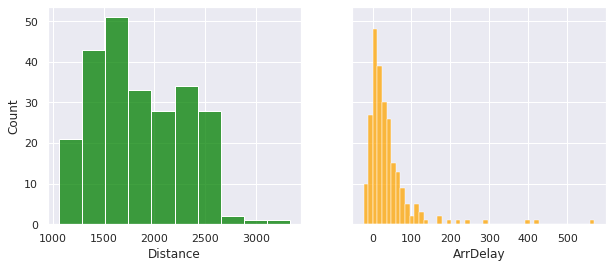

In [67]:
sns.set(style="darkgrid")


fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=(10, 4))
sns.histplot(data=df_cluster_0, x="Distance",color="green", ax=ax1 , bins=10)
sns.histplot(data=df_cluster_0, x="ArrDelay",color="orange", ax=ax2, bins=50);

In [68]:
df_cluster_2 = df_pca_kmeans.loc[df_pca_kmeans['Kmeans PCA'] == 2]
df_cluster_2.head()

ID  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0    101064.0    1.0         1.0        2.0   1402.0      1230.0   1417.0   
7   2214245.0    4.0        27.0        7.0   1221.0      1214.0   1457.0   
15  2976078.0    5.0         1.0        4.0   1439.0      1429.0   1609.0   
17  2785746.0    5.0        25.0        7.0    848.0       840.0   1010.0   
18  1747516.0    3.0        21.0        5.0    836.0       825.0   1029.0   

    CRSArrTime  UniqueCarrier   TailNum  ActualElapsedTime  CRSElapsedTime  \
0       1256.0       4.801239  0.051626               75.0            86.0   
7       1440.0       4.181724  0.206505              156.0           146.0   
15      1540.0       6.298400  0.051626               90.0            71.0   
17      1005.0       7.176045  0.154879               82.0            85.0   
18      1038.0       4.801239  0.103252              173.0           193.0   

    AirTime  ArrDelay  DepDelay    Origin      Dest  Distance  TaxiIn  \
0      56.0      81.0      92.0  2.374806  2.787816     370.0     6.0   
7     129.0      17.0       7.0  2.374806  1.806918     957.0     5.0   
15     42.0      29.0      10.0  1.187403  1.084151     214.0     3.0   
17     58.0       5.0       8.0  0.103252  3.510583     364.0    12.0   
18    158.0      -9.0      11.0  0.826020  1.806918    1091.0     5.0   

    TaxiOut  CarrierDelay  WeatherDelay   NASDelay  SecurityDelay  \
0      13.0      0.000000      0.000000   0.000000       0.000000   
7      22.0      7.000000      0.000000  10.000000       0.000000   
15     45.0     10.000000      0.000000  19.000000       0.000000   
17     12.0     18.381403      4.008668  15.340426       0.043341   
18     10.0     18.381403      4.008668  15.340426       0.043341   

    LateAircraftDelay  principal component 1  principal component 2  \
0           81.000000             466.419289            -415.399646   
7            0.000000             464.212025             206.911859   
15           0.000000             103.721285            -544.030292   
17          24.799842            1261.276612            -422.248496   
18          24.799842            1270.254513             324.742441   

    principal component 3  Kmeans PCA  
0              -39.356893           2  
7             -111.029530           2  
15             -89.864041           2  
17            -142.709088           2  
18            -116.858641           2

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

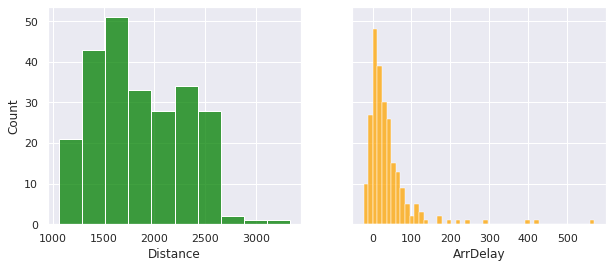

In [69]:
sns.set(style="darkgrid")

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=(10, 4))
sns.histplot(data=df_cluster_0, x="Distance",color="green", ax=ax1 , bins=10)
sns.histplot(data=df_cluster_0, x="ArrDelay",color="orange", ax=ax2, bins=50);

In [70]:
df_cluster_3 = df_pca_kmeans.loc[df_pca_kmeans['Kmeans PCA'] == 3]
df_cluster_3.head()

ID  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
34  6962945.0   12.0        17.0        3.0   2325.0      2115.0    721.0   
40  6964828.0   12.0        20.0        6.0   2216.0      1855.0     55.0   
57  5955102.0   11.0         7.0        5.0   2209.0      2125.0     25.0   
62  5487462.0   10.0        21.0        2.0   2230.0      2105.0     43.0   
76  1320996.0    3.0        20.0        4.0   2255.0      2220.0     30.0   

    CRSArrTime  UniqueCarrier   TailNum  ActualElapsedTime  CRSElapsedTime  \
34       539.0       3.045947  0.051626              296.0           324.0   
40      2139.0       3.045947  0.051626              159.0           164.0   
57      2345.0      20.030976  0.154879              136.0           140.0   
62      2352.0       4.801239  0.051626              193.0           227.0   
76      2352.0       3.562210  0.051626               95.0            92.0   

    AirTime  ArrDelay  DepDelay    Origin      Dest  Distance  TaxiIn  \
34    271.0     102.0     130.0  1.600413  1.703665    2693.0     4.0   
40    121.0     196.0     201.0  1.393908  2.271554    1005.0    27.0   
57    117.0      40.0      44.0  3.097574  0.774393     762.0     4.0   
62    171.0      51.0      85.0  2.684564  0.258131    1133.0     4.0   
76     66.0      38.0      35.0  1.239029  0.206505     413.0     7.0   

    TaxiOut  CarrierDelay  WeatherDelay  NASDelay  SecurityDelay  \
34     21.0          31.0           0.0       0.0            0.0   
40     11.0           8.0           0.0       0.0            0.0   
57     15.0           0.0           0.0       1.0            0.0   
62     18.0           0.0           0.0       0.0            0.0   
76     22.0          38.0           0.0       0.0            0.0   

    LateAircraftDelay  principal component 1  principal component 2  \
34               71.0             444.399255            1763.556776   
40              188.0              83.552436             175.906302   
57               39.0            -131.421562             -58.664008   
62               51.0            -133.938517             326.516465   
76                0.0            -213.795935            -418.553198   

    principal component 3  Kmeans PCA  
34            1435.074937           3  
40            1730.115279           3  
57            1853.147782           3  
62            1867.144219           3  
76            1886.216820           3

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

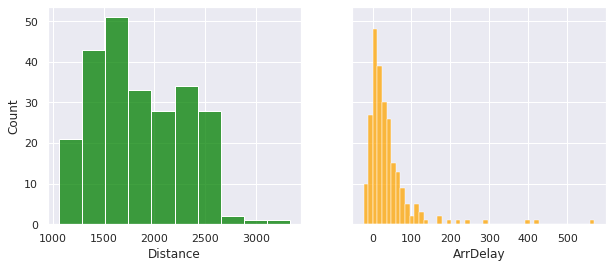

In [72]:
sns.set(style="darkgrid")

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=(10, 4))
sns.histplot(data=df_cluster_0, x="Distance",color="green", ax=ax1 , bins=10)
sns.histplot(data=df_cluster_0, x="ArrDelay",color="orange", ax=ax2, bins=50);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

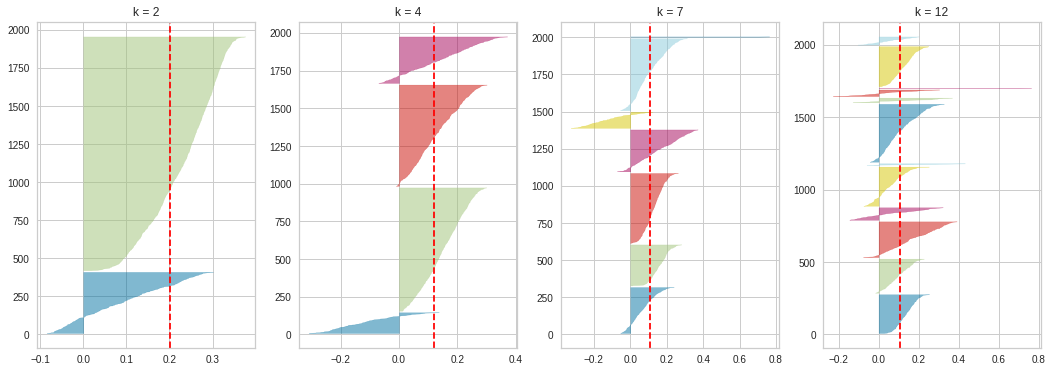

In [73]:
Scaler=StandardScaler()
X_transformed=Scaler.fit_transform(X)

fig,(ax1,ax2,ax3,ax4)=plt.subplots(figsize=(18,6),nrows=1,ncols=4)

#ax1
visualizer = SilhouetteVisualizer(KMeans(n_clusters=2, random_state=6858), colors='yellowbrick',ax=ax1)
visualizer.fit(X_transformed)        # Fit the data to the visualizer
ax1.set_title('k = 2')               # Title

#ax2
visualizer = SilhouetteVisualizer(KMeans(n_clusters=4, random_state=6858), colors='yellowbrick',ax=ax2)
visualizer.fit(X_transformed)        # Fit the data to the visualizer
ax2.set_title('k = 4')               # Title

#ax3
visualizer2 = SilhouetteVisualizer(KMeans(n_clusters=7, random_state=6858), colors='yellowbrick',ax=ax3)
visualizer2.fit(X_transformed)        # Fit the data to the visualizer
ax3.set_title('k = 7');               # Title

#ax4
visualizer2 = SilhouetteVisualizer(KMeans(n_clusters=12, random_state=6858), colors='yellowbrick',ax=ax4)
visualizer2.fit(X_transformed)        # Fit the data to the visualizer
ax4.set_title('k = 12');  

In [74]:
sil1 = silhouette_score(PCA_components, (KMeans(init = "k-means++", n_clusters = 2, n_init = 12, random_state=42).fit(PCA_components)).labels_)
sil2 = silhouette_score(PCA_components, (KMeans(init = "k-means++", n_clusters = 4, n_init = 12, random_state=42).fit(PCA_components)).labels_)
sil3 = silhouette_score(PCA_components, (KMeans(init = "k-means++", n_clusters = 7, n_init = 12, random_state=42).fit(PCA_components)).labels_)
sil4 = silhouette_score(PCA_components, (KMeans(init = "k-means++", n_clusters = 12, n_init = 12, random_state=42).fit(PCA_components)).labels_)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [79]:
silhouette = pd.DataFrame({'Meassure': ['2 Clusters' ,'4 Clusters', '7 Clusters', '12 Clusters'],
                            'Scores': [sil1,sil2,sil3,sil4]
                            })

<IPython.core.display.Javascript object>

In [82]:
silhouette

Meassure    Scores
0   2 Clusters  0.383237
1   4 Clusters  0.452363
2   7 Clusters  0.348595
3  12 Clusters  0.345720

# Hierarchy

In [83]:
import scipy.cluster.hierarchy as sch

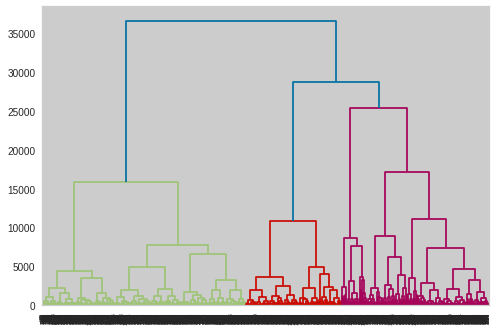

In [84]:
dendrogram = sch.dendrogram(sch.linkage(PCA_components, method='ward'))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

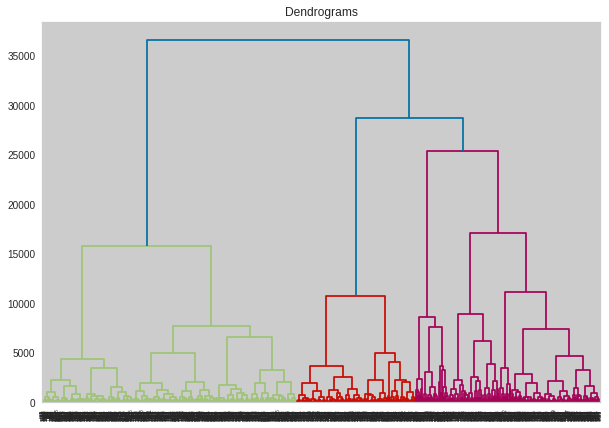

In [85]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(PCA_components, method='ward'))
plt.axhline(y=60000, color='r', linestyle='--')

In [86]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit(PCA_components)

AgglomerativeClustering(n_clusters=4)

In [87]:
labels_hier = cluster.labels_
labels_hier[:20]

array([2, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 2, 2, 2])

In [88]:
df_hier_pca = cluster.fit(PCA_components)

In [89]:
clusters_all_pca = pd.concat([df_pca_kmeans, pd.DataFrame({'pca_clusters_hier':labels_hier})], axis=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [90]:
clusters_all_pca.head()

ID  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0   101064.0    1.0         1.0        2.0   1402.0      1230.0   1417.0   
1  1507815.0    3.0        20.0        4.0   1723.0      1715.0   1932.0   
2  2980060.0    5.0         5.0        1.0    703.0       650.0   1031.0   
3  6158470.0   11.0         8.0        6.0   1628.0      1559.0   1731.0   
4  5039080.0    9.0        26.0        5.0   1526.0      1230.0   2322.0   

   CRSArrTime  UniqueCarrier   TailNum  ActualElapsedTime  CRSElapsedTime  \
0      1256.0       4.801239  0.051626               75.0            86.0   
1      1906.0       4.130098  0.051626              129.0           111.0   
2      1011.0       6.298400  0.051626              328.0           321.0   
3      1715.0       7.847186  0.051626               63.0            76.0   
4      2029.0       7.847186  0.051626              296.0           299.0   

   AirTime  ArrDelay  DepDelay    Origin      Dest  Distance  TaxiIn  TaxiOut  \
0     56.0      81.0      92.0  2.374806  2.787816     370.0     6.0     13.0   
1    100.0      26.0       8.0  0.103252  5.265875     317.0    12.0     17.0   
2    302.0      20.0      13.0  1.393908  1.910170    2105.0     8.0     18.0   
3     42.0      16.0      29.0  3.097574  2.787816     236.0     7.0     14.0   
4    280.0     173.0     176.0  0.154879  2.684564    2367.0     6.0     10.0   

   CarrierDelay  WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay  \
0           0.0           0.0       0.0            0.0               81.0   
1           8.0           0.0      18.0            0.0                0.0   
2           0.0           0.0      20.0            0.0                0.0   
3           0.0           0.0       0.0            0.0               16.0   
4           0.0           0.0       0.0            0.0              173.0   

   principal component 1  principal component 2  principal component 3  \
0             466.419289            -415.399646             -39.356893   
1            -523.522600            -404.861482             -74.536857   
2            1459.539018            1370.667238            -181.584072   
3            -202.848225            -518.079918             -40.025446   
4            -420.034300            1704.779232            -524.782081   

   Kmeans PCA  pca_clusters_hier  
0           2                  2  
1           1                  1  
2           0                  0  
3           1                  1  
4           0                  0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

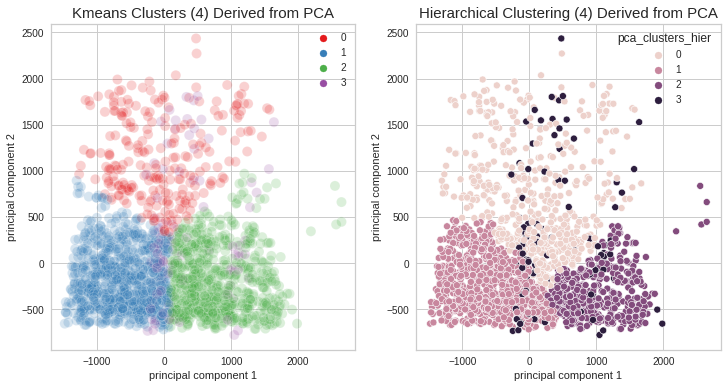

In [92]:
# scatter plot using the first 2 principal components to observe the cluster distribution

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.scatterplot(clusters_pca.iloc[:,0], clusters_pca.iloc[:,1],
               hue = labels_pca, palette='Set1', s= 100,
               alpha= 0.2).set_title('Kmeans Clusters (4) Derived from PCA',
                                   fontsize= 15)



plt.subplot(1,2,2)
sns.scatterplot(x= 'principal component 1', y='principal component 2',
                data= clusters_all_pca, hue= 'pca_clusters_hier').set_title('Hierarchical Clustering (4) Derived from PCA',
                                   fontsize=15);